In [ ]:
# prompt: drive

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import librosa

def get_audio_lengths(directory_path):
    min_length = float('inf')
    max_length = float('-inf')

    for filename in os.listdir(directory_path):
        if filename.endswith('.wav'):
            file_path = os.path.join(directory_path, filename)
            audio, sr = librosa.load(file_path, sr=None)
            duration = librosa.get_duration(y=audio, sr=sr)

            if duration < min_length:
                min_length = duration
            if duration > max_length:
                max_length = duration

    return min_length, max_length

# Define your directories
flute_directory = '/content/gdrive/MyDrive/EDA Classification/EDA/Flute'
gataberaya_directory = '/content/gdrive/MyDrive/EDA Classification/EDA/Gataberaya'

# Get lengths for flute files
flute_min_length, flute_max_length = get_audio_lengths(flute_directory)
print(f"Flute - Shortest length: {flute_min_length:.2f} seconds, Longest length: {flute_max_length:.2f} seconds")

# Get lengths for gataberaya files
gataberaya_min_length, gataberaya_max_length = get_audio_lengths(gataberaya_directory)
print(f"Gataberaya - Shortest length: {gataberaya_min_length:.2f} seconds, Longest length: {gataberaya_max_length:.2f} seconds")


Flute - Shortest length: 0.32 seconds, Longest length: 1.20 seconds
Gataberaya - Shortest length: 0.16 seconds, Longest length: 0.78 seconds


In [ ]:
import os
import numpy as np
import librosa

# Function to process audio and extract features over the entire duration
def process_audio(file_path, sr=44100, n_mfcc=13):
    audio, sr = librosa.load(file_path, sr=sr)

    # Extract features
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    tonnetz = librosa.feature.tonnetz(y=audio, sr=sr)

    # Combine all features into a single vector
    features = np.concatenate((mfcc, chroma, mel_spectrogram, spectral_contrast, tonnetz), axis=0)

    return features

# Output directory to save combined features
output_directory = '/content/gdrive/MyDrive/CombinedFeatures'

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Process flute audio files
for filename in os.listdir(flute_directory):
    if filename.endswith('.wav'):
        file_path = os.path.join(flute_directory, filename)
        features = process_audio(file_path)
        # Save combined features as numpy array
        save_path = os.path.join(output_directory, f'flute_{os.path.splitext(filename)[0]}.npy')
        np.save(save_path, features)

# Process gataberaya audio files
for filename in os.listdir(gataberaya_directory):
    if filename.endswith('.wav'):
        file_path = os.path.join(gataberaya_directory, filename)
        features = process_audio(file_path)
        # Save combined features as numpy array
        save_path = os.path.join(output_directory, f'gataberaya_{os.path.splitext(filename)[0]}.npy')
        np.save(save_path, features)

print("Combined features saved successfully.")


Combined features saved successfully.


In [ ]:
# Randomly select 10 vectors from each instrument
np.random.seed(42)  # For reproducibility
flute_indices = np.random.choice(flute_features.shape[0], size=10, replace=False)
gataberaya_indices = np.random.choice(gataberaya_features.shape[0], size=10, replace=False)

# Print selected vectors
print("Randomly selected vectors for Flute:")
for idx in flute_indices:
    print(flute_features[idx])

print("\nRandomly selected vectors for Gataberaya:")
for idx in gataberaya_indices:
    print(gataberaya_features[idx])

NameError: name 'flute_features' is not defined

In [ ]:
import os

# Update the path to point to your directory
general_path = '/content/gdrive/MyDrive/audio classification'

# List the contents of the directory
print(list(os.listdir(general_path)))


['Gataberaya', 'Flue']


In [ ]:
import librosa
import numpy as np

# Define the new file path
new_audio_path = '/content/gdrive/MyDrive/audio classification/Flue/A sharp 5-3.wav'

# Importing the new file
y, sr = librosa.load(new_audio_path)

# Print the audio signal and its properties
print('y : Amplitude Values :', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (Hz):', sr, '\n')

# Verify the length of the audio
print('duration in seconds:', len(y) / sr)


y : Amplitude Values : [-0.00057834 -0.00099431 -0.00110049 ...  0.          0.
  0.        ] 

y shape: (46242,) 

Sample Rate (Hz): 22050 

duration in seconds: 2.097142857142857


In [ ]:
import os

# Directory containing audio files
directory = '/content/gdrive/MyDrive/audio classification'

# List all classes (subdirectories)
classes = os.listdir(directory)
print("Classes:", classes)


Classes: ['Gataberaya', 'Flue']


In [ ]:
pip install playsound


  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=b123c55130b448957aaa8934412f8a28ba43b7d9039da62c5b8342eb60a8e27d
  Stored in directory: /root/.cache/pip/wheels/90/89/ed/2d643f4226fc8c7c9156fc28abd8051e2d2c0de37ae51ac45c
Successfully built playsound


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq
import scipy.io.wavfile as wav
import json
from playsound import playsound


ModuleNotFoundError: No module named 'playsound'

#EDA

In [ ]:
import os
import pandas as pd

# Path to the directory containing the classes
base_path = '/content/gdrive/MyDrive/EDA Classification/EDA'

# List of classes
classes = os.listdir(base_path)

# Initialize an empty list to store data for each file
data = []

# Traverse through each class
for class_name in classes:
    class_path = os.path.join(base_path, class_name)
    # List all WAV files in the class directory
    wav_files = [file for file in os.listdir(class_path) if file.endswith('.wav')]
    # Create a DataFrame for the class
    class_df = pd.DataFrame({'file_path': [os.path.join(class_path, file) for file in wav_files],
                             'class_label': [class_name] * len(wav_files)})
    # Append the DataFrame to the list
    data.append(class_df)

# Concatenate the DataFrames for each class into one DataFrame
df = pd.concat(data, ignore_index=True)

# Display the DataFrame
display(df.head())
display(df.tail())



,file_path,class_label
0,/content/gdrive/MyDrive/EDA Classification/EDA...,Flute
1,/content/gdrive/MyDrive/EDA Classification/EDA...,Flute
2,/content/gdrive/MyDrive/EDA Classification/EDA...,Flute
3,/content/gdrive/MyDrive/EDA Classification/EDA...,Flute
4,/content/gdrive/MyDrive/EDA Classification/EDA...,Flute


,file_path,class_label
244,/content/gdrive/MyDrive/EDA Classification/EDA...,Gataberaya
245,/content/gdrive/MyDrive/EDA Classification/EDA...,Gataberaya
246,/content/gdrive/MyDrive/EDA Classification/EDA...,Gataberaya
247,/content/gdrive/MyDrive/EDA Classification/EDA...,Gataberaya
248,/content/gdrive/MyDrive/EDA Classification/EDA...,Gataberaya


In [ ]:
# Get the count of each class
class_counts = df['class_label'].value_counts()

# Print the count of each class
print("Class Counts:")
print(class_counts)


Class Counts:
class_label
Flute         168
Gataberaya     81
Name: count, dtype: int64


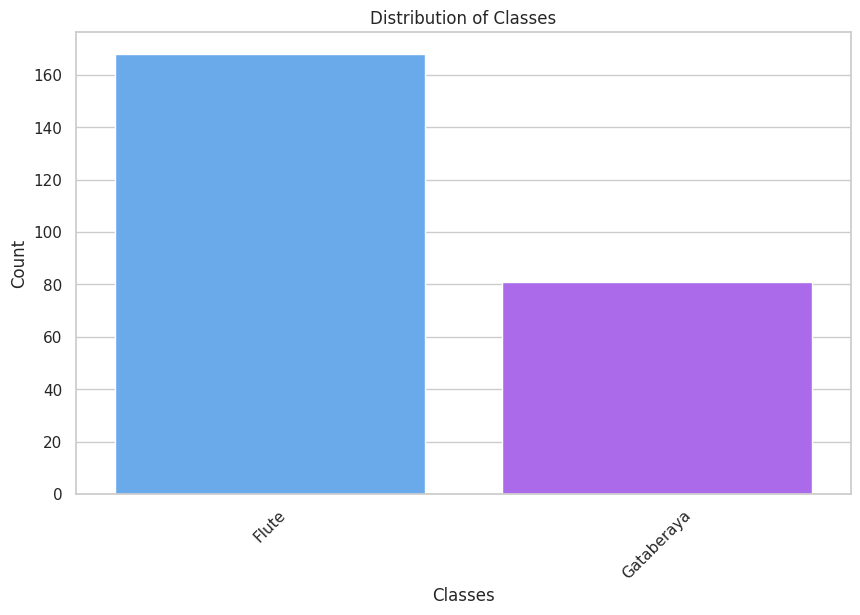

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Create the count plot with "cool" color palette
plt.figure(figsize=(10, 6))
sns.countplot(x='class_label', data=df, palette='cool')
plt.title('Distribution of Classes')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import os
import librosa
import numpy as np
import pandas as pd

# Function to calculate basic statistics for audio files
def calculate_basic_stats(audio_dir):
    file_stats = []

    for root, dirs, files in os.walk(audio_dir):
        for file in files:
            if file.endswith('.wav'):
                file_path = os.path.join(root, file)
                class_label = os.path.basename(root)

                # Load audio file
                audio_data, sr = librosa.load(file_path, sr=None)

                # Calculate duration
                duration = librosa.get_duration(y=audio_data, sr=sr)

                # Calculate amplitude distribution
                amplitude_mean = np.mean(np.abs(audio_data))
                amplitude_std = np.std(np.abs(audio_data))
                amplitude_max = np.max(np.abs(audio_data))
                amplitude_min = np.min(np.abs(audio_data))

                # Append stats to list
                file_stats.append({
                    'File': file,
                    'Class': class_label,
                    'Duration (s)': duration,
                    'Sampling Rate (Hz)': sr,
                    'Amplitude Mean': amplitude_mean,
                    'Amplitude Std': amplitude_std,
                    'Amplitude Max': amplitude_max,
                    'Amplitude Min': amplitude_min
                })

    return pd.DataFrame(file_stats)

# Provide path to the directory containing audio files
audio_directory = "/content/gdrive/MyDrive/EDA Classification/EDA"

# Calculate basic statistics
basic_stats_df = calculate_basic_stats(audio_directory)

# Display the table
print(basic_stats_df)


                 File        Class  Duration (s)  Sampling Rate (Hz)  \
0     D sharp 6-2.wav       flute1      0.902971               44100   
1           G 6-2.wav       flute1      0.940091               44100   
2           A 4-1.wav       flute1      1.005374               44100   
3           A 4-2.wav       flute1      0.426054               44100   
4           A 4-3.wav       flute1      1.018503               44100   
..                ...          ...           ...                 ...   
244     Thath 3-6.wav  gataberaya1      0.376213               44100   
245      Thath4-1.wav  gataberaya1      0.378435               44100   
246      Thath4-2.wav  gataberaya1      0.233424               44100   
247      Thath4-3.wav  gataberaya1      0.221791               44100   
248      Thath4-4.wav  gataberaya1      0.236984               44100   

     Amplitude Mean  Amplitude Std  Amplitude Max  Amplitude Min  
0          0.138626       0.078136       0.301727       0.000000  
1

In [ ]:
import os

# Function to extract features (audio file paths) and target labels (class names)
def extract_features_and_labels(base_path):
    X = []  # Features (audio file paths)
    y = []  # Target labels (class names)

    # Traverse through each class
    for class_name in os.listdir(base_path):
        class_path = os.path.join(base_path, class_name)
        # List all WAV files in the class directory
        wav_files = [file for file in os.listdir(class_path) if file.endswith('.wav')]
        # Append audio file paths and corresponding class names to X and y respectively
        X.extend([os.path.join(class_path, file) for file in wav_files])
        y.extend([class_name] * len(wav_files))

    return X, y

# Provide the base path to the directory containing audio files
base_path = '/content/gdrive/MyDrive/EDA Classification/EDA'

# Extract features (audio file paths) and target labels (class names)
X, y = extract_features_and_labels(base_path)

In [ ]:
# Display the first few elements of X and y
print("First few elements of Features (X):", X[:5])
print("First few elements of Target Labels (y):", y[:5])

# Display the last few elements of X and y
print("Last few elements of Features (X):", X[-5:])
print("Last few elements of Target Labels (y):", y[-5:])


First few elements of Features (X): ['/content/gdrive/MyDrive/EDA Classification/EDA/Flute/ D sharp 6-2.wav', '/content/gdrive/MyDrive/EDA Classification/EDA/Flute/ G 6-2.wav', '/content/gdrive/MyDrive/EDA Classification/EDA/Flute/A 4-1.wav', '/content/gdrive/MyDrive/EDA Classification/EDA/Flute/A 4-2.wav', '/content/gdrive/MyDrive/EDA Classification/EDA/Flute/A 4-3.wav']
First few elements of Target Labels (y): ['Flute', 'Flute', 'Flute', 'Flute', 'Flute']
Last few elements of Features (X): ['/content/gdrive/MyDrive/EDA Classification/EDA/Gataberaya/Thath 3-6.wav', '/content/gdrive/MyDrive/EDA Classification/EDA/Gataberaya/Thath4-1.wav', '/content/gdrive/MyDrive/EDA Classification/EDA/Gataberaya/Thath4-2.wav', '/content/gdrive/MyDrive/EDA Classification/EDA/Gataberaya/Thath4-3.wav', '/content/gdrive/MyDrive/EDA Classification/EDA/Gataberaya/Thath4-4.wav']
Last few elements of Target Labels (y): ['Gataberaya', 'Gataberaya', 'Gataberaya', 'Gataberaya', 'Gataberaya']


In [ ]:
import pandas as pd

# Create a DataFrame from features (X) and target labels (y)
df = pd.DataFrame({'file_path': X, 'class_label': y})

# Display the DataFrame
print(df.head())
print(df.tail())


                                           file_path class_label
0  /content/gdrive/MyDrive/EDA Classification/EDA...       Flute
1  /content/gdrive/MyDrive/EDA Classification/EDA...       Flute
2  /content/gdrive/MyDrive/EDA Classification/EDA...       Flute
3  /content/gdrive/MyDrive/EDA Classification/EDA...       Flute
4  /content/gdrive/MyDrive/EDA Classification/EDA...       Flute
                                             file_path class_label
244  /content/gdrive/MyDrive/EDA Classification/EDA...  Gataberaya
245  /content/gdrive/MyDrive/EDA Classification/EDA...  Gataberaya
246  /content/gdrive/MyDrive/EDA Classification/EDA...  Gataberaya
247  /content/gdrive/MyDrive/EDA Classification/EDA...  Gataberaya
248  /content/gdrive/MyDrive/EDA Classification/EDA...  Gataberaya


In [ ]:
# Display the DataFrame as a table
display(df.head())
display(df.tail())


,file_path,class_label
0,/content/gdrive/MyDrive/EDA Classification/EDA...,Flute
1,/content/gdrive/MyDrive/EDA Classification/EDA...,Flute
2,/content/gdrive/MyDrive/EDA Classification/EDA...,Flute
3,/content/gdrive/MyDrive/EDA Classification/EDA...,Flute
4,/content/gdrive/MyDrive/EDA Classification/EDA...,Flute


,file_path,class_label
244,/content/gdrive/MyDrive/EDA Classification/EDA...,Gataberaya
245,/content/gdrive/MyDrive/EDA Classification/EDA...,Gataberaya
246,/content/gdrive/MyDrive/EDA Classification/EDA...,Gataberaya
247,/content/gdrive/MyDrive/EDA Classification/EDA...,Gataberaya
248,/content/gdrive/MyDrive/EDA Classification/EDA...,Gataberaya


In [ ]:
import os

# Function to scan the directory and prepare a list of all the audio file paths
def scan_directory(base_path):
    audio_paths = []  # List to store audio file paths

    # Traverse through each class
    for class_name in os.listdir(base_path):
        class_path = os.path.join(base_path, class_name)
        # List all WAV files in the class directory
        wav_files = [file for file in os.listdir(class_path) if file.endswith('.wav')]
        # Append audio file paths to the list
        audio_paths.extend([os.path.join(class_path, file) for file in wav_files])

    return audio_paths

# Function to extract the class label from each file name or from the name of the parent sub-folder
def extract_class_label(file_path):
    # Extract the class label from the parent folder name
    class_label = os.path.basename(os.path.dirname(file_path))
    return class_label

# Function to map each class name from text to a numeric class ID
def map_class_to_numeric(class_names):
    # Create a dictionary to map class names to numeric IDs
    class_to_id = {class_name: i for i, class_name in enumerate(set(class_names))}
    # Map class names to numeric IDs
    numeric_class_ids = [class_to_id[class_name] for class_name in class_names]
    return numeric_class_ids, class_to_id

# Provide the base path to the directory containing audio files
base_path = '/content/gdrive/MyDrive/EDA Classification/EDA'

# Scan the directory and prepare a list of all the audio file paths
audio_paths = scan_directory(base_path)

# Extract the class label from each file name or from the name of the parent sub-folder
class_labels = [extract_class_label(file_path) for file_path in audio_paths]

# Map each class name from text to a numeric class ID
numeric_class_ids, class_to_id = map_class_to_numeric(class_labels)

# Display the first few audio file paths, class labels, and numeric class IDs
print("First few audio file paths:", audio_paths[:5])
print("First few class labels:", class_labels[:5])
print("First few numeric class IDs:", numeric_class_ids[:5])

# Display the mapping of class names to numeric class IDs
print("Class name to numeric ID mapping:")
for class_name, numeric_id in class_to_id.items():
    print(f"{class_name}: {numeric_id}")


First few audio file paths: ['/content/gdrive/MyDrive/EDA Classification/EDA/Flute/ D sharp 6-2.wav', '/content/gdrive/MyDrive/EDA Classification/EDA/Flute/ G 6-2.wav', '/content/gdrive/MyDrive/EDA Classification/EDA/Flute/A 4-1.wav', '/content/gdrive/MyDrive/EDA Classification/EDA/Flute/A 4-2.wav', '/content/gdrive/MyDrive/EDA Classification/EDA/Flute/A 4-3.wav']
First few class labels: ['Flute', 'Flute', 'Flute', 'Flute', 'Flute']
First few numeric class IDs: [1, 1, 1, 1, 1]
Class name to numeric ID mapping:
Gataberaya: 0
Flute: 1


In [ ]:
# prompt: googke drive'

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#Audio Pre-processing

checking the channel type

In [ ]:
import librosa

# Load audio file
audio_path = '/content/gdrive/MyDrive/melspectrogram model /Melsp'
y, sr = librosa.load(audio_path, sr=None, mono=False)

# Check if the audio has multiple channels
is_stereo = y.ndim > 1

if is_stereo:
    print("The audio file is stereo.")
else:
    print("The audio file is mono.")


IsADirectoryError: [Errno 21] Is a directory: '/content/gdrive/MyDrive/melspectrogram model /Melsp'

In [ ]:
!pip install pydub


In [ ]:
import os
import librosa
from pydub import AudioSegment

def check_audio_channel(audio_path):
    try:
        # Using librosa
        y, _ = librosa.load(audio_path, sr=None, mono=False)
        is_stereo_librosa = y.ndim > 1

        # Using pydub
        audio = AudioSegment.from_file(audio_path)
        is_stereo_pydub = audio.channels > 1

        return is_stereo_librosa, is_stereo_pydub
    except Exception as e:
        print(f"Error processing {audio_path}: {str(e)}")
        return None, None

def check_directory(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.wav'):
                audio_path = os.path.join(root, file)
                is_stereo_librosa, is_stereo_pydub = check_audio_channel(audio_path)

                if is_stereo_librosa is not None and is_stereo_pydub is not None:
                    print(f"File: {audio_path}")
                    print(f"Librosa stereo: {is_stereo_librosa}")
                    print(f"Pydub stereo: {is_stereo_pydub}\n")

# Check the Flue directory
flue_directory = '/content/gdrive/MyDrive/melspectrogram model /Melsp/flute1'
check_directory(flue_directory)

# Check the Gataberaya directory
gataberaya_directory = '/content/gdrive/MyDrive/melspectrogram model /Melsp/gataberaya1'
check_directory(gataberaya_directory)


File: /content/gdrive/MyDrive/melspectrogram model /Melsp/flute1/ D sharp 6-2.wav
Librosa stereo: True
Pydub stereo: True

File: /content/gdrive/MyDrive/melspectrogram model /Melsp/flute1/ G 6-2.wav
Librosa stereo: True
Pydub stereo: True

File: /content/gdrive/MyDrive/melspectrogram model /Melsp/flute1/A 4-1.wav
Librosa stereo: True
Pydub stereo: True

File: /content/gdrive/MyDrive/melspectrogram model /Melsp/flute1/A 4-2.wav
Librosa stereo: True
Pydub stereo: True

File: /content/gdrive/MyDrive/melspectrogram model /Melsp/flute1/A 4-3.wav
Librosa stereo: True
Pydub stereo: True

File: /content/gdrive/MyDrive/melspectrogram model /Melsp/flute1/A 4-4.wav
Librosa stereo: True
Pydub stereo: True

File: /content/gdrive/MyDrive/melspectrogram model /Melsp/flute1/A 4-5.wav
Librosa stereo: True
Pydub stereo: True

File: /content/gdrive/MyDrive/melspectrogram model /Melsp/flute1/A 5-1.wav
Librosa stereo: True
Pydub stereo: True

File: /content/gdrive/MyDrive/melspectrogram model /Melsp/flute1

In [ ]:
!pip install --upgrade pydub  # Use ! to run as a shell command in Colab

In [ ]:
import pydub
print(pydub.__version__)

AttributeError: module 'pydub' has no attribute '__version__'

In [ ]:
import os
import librosa
from pydub import AudioSegment

# ... (Existing functions: check_audio_channel, check_directory) ...

def remove_silence(audio_data, threshold=-50, min_silence_len=100, silence_thresh=-50):
  """
  Removes silent parts from an audio segment using pydub.

  Args:
    audio_data: The audio data as a pydub.AudioSegment object.
    threshold: The threshold in dBFS below which audio is considered silent.
    min_silence_len: The minimum length of silence in milliseconds.
    silence_thresh: The threshold in dBFS for detecting non-silent segments.

  Returns:
    The audio data with silent parts removed as a pydub.AudioSegment object.
  """
  audio_data_without_silence = audio_data.split_on_silence(min_silence_len=min_silence_len,
                                                          silence_thresh=silence_thresh,
                                                          keep_silence=0)
  return audio_data_without_silence

def process_audio_file(audio_path):
  """
  Checks audio channels and removes silence from an audio file.

  Args:
    audio_path: The path to the audio file.
  """
  is_stereo_librosa, is_stereo_pydub = check_audio_channel(audio_path)
  if is_stereo_librosa is not None and is_stereo_pydub is not None:
    print(f"File: {audio_path}")
    print(f"Librosa stereo: {is_stereo_librosa}")
    print(f"Pydub stereo: {is_stereo_pydub}")

    audio_data = AudioSegment.from_file(audio_path)
    audio_data_without_silence = remove_silence(audio_data)

    # Save the audio without silence (example, adjust as needed)
    output_path = audio_path[:-4] + "_no_silence.wav"
    audio_data_without_silence.export(output_path, format="wav")
    print(f"Saved audio without silence to: {output_path}\n")

def process_directory(directory):
  for root, _, files in os.walk(directory):
    for file in files:
      if file.endswith('.wav'):
        audio_path = os.path.join(root, file)
        process_audio_file(audio_path)
process_directory(flue_directory)
process_directory(gataberaya_directory)

File: /content/gdrive/MyDrive/audio classification/Flue/C sharp 4 -1 .wav
Librosa stereo: False
Pydub stereo: False


AttributeError: 'AudioSegment' object has no attribute 'split_on_silence'

In [ ]:
base_path ="/content/gdrive/MyDrive/melspectrogram model /Melsp"

check the sampling rate if it's needed to be standadized or not


In [ ]:
import os
import librosa

# Function to scan the directory and prepare a list of all the audio file paths
# Also returns the sample rate of each audio file
def scan_directory_with_sample_rate(base_path):
    audio_paths = []  # List to store audio file paths
    sample_rates = []  # List to store sample rates

    # Traverse through each class
    for class_name in os.listdir(base_path):
        class_path = os.path.join(base_path, class_name)
        # List all WAV files in the class directory
        wav_files = [file for file in os.listdir(class_path) if file.endswith('.wav')]
        # Append audio file paths and sample rates to the lists
        for file in wav_files:
            file_path = os.path.join(class_path, file)
            audio_paths.append(file_path)
            # Load audio file to get sample rate
            audio_data, sr = librosa.load(file_path, sr=None)
            sample_rates.append(sr)

    return audio_paths, sample_rates

# Scan the directory and prepare a list of all the audio file paths
# Also get the sample rate of each audio file
audio_paths, sample_rates = scan_directory_with_sample_rate(base_path)

# Check if all sample rates are 44100
all_44100 = all(sr == 44100 for sr in sample_rates)

if all_44100:
    print("All sample rates are 44100.")
else:
    print("Not all sample rates are 44100.")


All sample rates are 44100.


Check the length

In [ ]:
import librosa

# Function to check if audio samples have the same or different lengths
def check_audio_lengths(audio_paths):
    # Load the first audio file to get its length
    first_audio_data, _ = librosa.load(audio_paths[0], sr=None)
    first_audio_length = len(first_audio_data)

    # Iterate through the remaining audio files and compare their lengths
    for audio_path in audio_paths[1:]:
        audio_data, _ = librosa.load(audio_path, sr=None)
        if len(audio_data) != first_audio_length:
            return False
    return True

# Check if all audio samples have the same lengths
same_lengths = check_audio_lengths(audio_paths)

if same_lengths:
    print("All audio samples have the same length.")
else:
    print("Audio samples have different lengths.")


Audio samples have different lengths.


In [ ]:
import os

# Function to get all audio file paths in a directory
def get_audio_paths(directory):
    audio_paths = []
    for filename in os.listdir(directory):
        if filename.endswith(".wav"):  # Assuming all audio files are in .wav format
            audio_paths.append(os.path.join(directory, filename))
    return audio_paths

# Define the directories containing audio files
flue_directory = "/content/gdrive/MyDrive/melspectrogram model /Melsp/flute1"
gataberaya_directory = "/content/gdrive/MyDrive/melspectrogram model /Melsp/gataberaya1"

# Get the audio file paths in each directory
flue_paths = get_audio_paths(flue_directory)
gataberaya_paths = get_audio_paths(gataberaya_directory)

# Function to check if audio samples have the same or different lengths
def check_audio_lengths(audio_paths):
    # Load the first audio file to get its length
    first_audio_data, _ = librosa.load(audio_paths[0], sr=None)
    first_audio_length = len(first_audio_data)

    # Iterate through the remaining audio files and compare their lengths
    for audio_path in audio_paths[1:]:
        audio_data, _ = librosa.load(audio_path, sr=None)
        if len(audio_data) != first_audio_length:
            return False
    return True

# Check if all audio samples in Flue directory have the same lengths
flue_same_lengths = check_audio_lengths(flue_paths)
if flue_same_lengths:
    print("All audio samples in Flue directory have the same length.")
else:
    print("Audio samples in Flue directory have different lengths.")

# Check if all audio samples in Gataberaya directory have the same lengths
gataberaya_same_lengths = check_audio_lengths(gataberaya_paths)
if gataberaya_same_lengths:
    print("All audio samples in Gataberaya directory have the same length.")
else:
    print("Audio samples in Gataberaya directory have different lengths.")


Audio samples in Flue directory have different lengths.
Audio samples in Gataberaya directory have different lengths.


In [ ]:
# Function to get the lengths of the first five audio files in a given path
def get_audio_lengths(audio_paths):
    lengths = []
    for audio_path in audio_paths[:5]:  # Limit to the first five files
        audio_data, _ = librosa.load(audio_path, sr=None)
        lengths.append(len(audio_data))
    return lengths


# Get the lengths of the first five audio samples in each directory
flue_lengths = get_audio_lengths(flue_paths)
gataberaya_lengths = get_audio_lengths(gataberaya_paths)

# Print the lengths
print("Lengths of the first five audio samples in Flue directory:", flue_lengths)
print("Lengths of the first five audio samples in Gataberaya directory:", gataberaya_lengths)


Lengths of the first five audio samples in Flue directory: [92485, 92484, 92484, 92484, 92484]
Lengths of the first five audio samples in Gataberaya directory: [92484, 92484, 92484, 92484, 92484]


In [ ]:
import os
import librosa
import numpy as np

# ... (get_audio_paths function remains the same)

# Function to pad audio files to the global maximum length
def pad_audio_files(audio_paths_list):
    max_length = 0
    padded_audio_data = []

    # Find the global maximum length across all directories
    for audio_paths in audio_paths_list:
        for audio_path in audio_paths:
            audio_data, sr = librosa.load(audio_path, sr=None)
            max_length = max(max_length, len(audio_data))

    # Pad each audio file to the global maximum length
    for audio_paths in audio_paths_list:
        for audio_path in audio_paths:
            audio_data, sr = librosa.load(audio_path, sr=None)

            if len(audio_data) < max_length:
                padded_audio = np.pad(audio_data, (0, max_length - len(audio_data)), mode='constant')
                padded_audio_data.append(padded_audio)
            else:
                padded_audio_data.append(audio_data)

    return padded_audio_data

# Define the directories containing audio files
flue_directory = "/content/gdrive/MyDrive/melspectrogram model /Melsp/flute1"
gataberaya_directory = "/content/gdrive/MyDrive/melspectrogram model /Melsp/gataberaya1"

# Get the audio file paths in each directory
flue_paths = get_audio_paths(flue_directory)
gataberaya_paths = get_audio_paths(gataberaya_directory)

# Pad the audio files and store in variables
all_audio_paths = [flue_paths, gataberaya_paths]
padded_audio = pad_audio_files(all_audio_paths)

# Print the lengths of the padded audio files
for i, audio_data in enumerate(padded_audio):
    print(f"Audio file {i+1}: Length = {len(audio_data)} samples")

Audio file 1: Length = 52886 samples
Audio file 2: Length = 52886 samples
Audio file 3: Length = 52886 samples
Audio file 4: Length = 52886 samples
Audio file 5: Length = 52886 samples
Audio file 6: Length = 52886 samples
Audio file 7: Length = 52886 samples
Audio file 8: Length = 52886 samples
Audio file 9: Length = 52886 samples
Audio file 10: Length = 52886 samples
Audio file 11: Length = 52886 samples
Audio file 12: Length = 52886 samples
Audio file 13: Length = 52886 samples
Audio file 14: Length = 52886 samples
Audio file 15: Length = 52886 samples
Audio file 16: Length = 52886 samples
Audio file 17: Length = 52886 samples
Audio file 18: Length = 52886 samples
Audio file 19: Length = 52886 samples
Audio file 20: Length = 52886 samples
Audio file 21: Length = 52886 samples
Audio file 22: Length = 52886 samples
Audio file 23: Length = 52886 samples
Audio file 24: Length = 52886 samples
Audio file 25: Length = 52886 samples
Audio file 26: Length = 52886 samples
Audio file 27: Length

In [ ]:
import os
import librosa
import numpy as np

# Function to get all audio file paths in a directory
def get_audio_paths(directory):
    audio_paths = []
    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            audio_paths.append(os.path.join(directory, filename))
    return audio_paths

# Function to pad audio files to the global maximum length
def pad_audio_files(audio_paths_list):
    max_length = 0
    padded_audio_data = []

    # Find the global maximum length across all directories
    for audio_paths in audio_paths_list:
        for audio_path in audio_paths:
            audio_data, sr = librosa.load(audio_path, sr=None)
            max_length = max(max_length, len(audio_data))

    # Pad each audio file to the global maximum length
    flue_padded_audio = []
    gataberaya_padded_audio = []
    for i, audio_paths in enumerate(audio_paths_list):
        for audio_path in audio_paths:
            audio_data, sr = librosa.load(audio_path, sr=None)

            if len(audio_data) < max_length:
                padded_audio = np.pad(audio_data, (0, max_length - len(audio_data)), mode='constant')
                if i == 0:
                    flue_padded_audio.append(padded_audio)
                else:
                    gataberaya_padded_audio.append(padded_audio)
            else:
                if i == 0:
                    flue_padded_audio.append(audio_data)
                else:
                    gataberaya_padded_audio.append(audio_data)

    return flue_padded_audio, gataberaya_padded_audio

# Define the directories containing audio files
flue_directory = "/content/gdrive/MyDrive/melspectrogram model /Melsp/flute1"
gataberaya_directory = "/content/gdrive/MyDrive/melspectrogram model /Melsp/gataberaya1"

# Get the audio file paths in each directory
flue_paths = get_audio_paths(flue_directory)
gataberaya_paths = get_audio_paths(gataberaya_directory)

# Pad the audio files and store in variables
all_audio_paths = [flue_paths, gataberaya_paths]
flue_padded_audio, gataberaya_padded_audio = pad_audio_files(all_audio_paths)

# Get the sampling rate from the first file in each directory
flue_sr = librosa.get_samplerate(flue_paths[0])
gataberaya_sr = librosa.get_samplerate(gataberaya_paths[0])

# Calculate and print the length in seconds for each directory
flue_length_seconds = len(flue_padded_audio[0]) / flue_sr
gataberaya_length_seconds = len(gataberaya_padded_audio[0]) / gataberaya_sr

print(f"Flue length in seconds: {flue_length_seconds}")
print(f"Gataberaya length in seconds: {gataberaya_length_seconds}")

Flue length in seconds: 1.1992290249433106
Gataberaya length in seconds: 1.1992290249433106


In [ ]:
import os
import librosa
import numpy as np

# Function to get all audio file paths in a directory
def get_audio_paths(directory):
    audio_paths = []
    for filename in os.listdir(directory):
        if filename.endswith(".wav"):  # Assuming all audio files are in .wav format
            audio_paths.append(os.path.join(directory, filename))
    return audio_paths

# Function to check if audio samples have the same or different lengths
def check_audio_lengths(audio_paths):
    # Load the first audio file to get its length
    first_audio_data, _ = librosa.load(audio_paths[0], sr=None)
    first_audio_length = len(first_audio_data)

    # Iterate through the remaining audio files and compare their lengths
    for audio_path in audio_paths[1:]:
        audio_data, _ = librosa.load(audio_path, sr=None)
        if len(audio_data) != first_audio_length:
            return False
    return True

# Function to save new audio files and store their audio data in a variable
def save_audio_files(audio_paths, target_duration):
    length_same_audio = []  # List to store audio data of new files

    # Iterate through each audio file path
    for audio_path in audio_paths:
        # Load the audio data
        audio_data, sr = librosa.load(audio_path, sr=None)

        # Calculate the number of samples for the target duration
        target_length = int(target_duration * sr)

        # Ensure that the audio has the desired length
        if len(audio_data) < target_length:
            # If audio is shorter, pad it with zeros
            padded_audio = np.pad(audio_data, (0, target_length - len(audio_data)), mode='constant')
            length_same_audio.append(padded_audio)
        elif len(audio_data) > target_length:
            # If audio is longer, truncate it
            truncated_audio = audio_data[:target_length]
            length_same_audio.append(truncated_audio)
        else:
            # If audio has the desired length, keep it as is
            length_same_audio.append(audio_data)

    return length_same_audio

# Define the directories containing audio files
flue_directory = "/content/gdrive/MyDrive/melspectrogram model /Melsp/flute1"
gataberaya_directory = "/content/gdrive/MyDrive/melspectrogram model /Melsp/gataberaya1"

# Get the audio file paths in each directory
flue_paths = get_audio_paths(flue_directory)
gataberaya_paths = get_audio_paths(gataberaya_directory)

# Target duration in seconds
target_duration = 2.1

# Save new audio files and store their audio data with the target duration for Flue directory
flue_same_audio = save_audio_files(flue_paths, target_duration)

# Save new audio files and store their audio data with the target duration for Gataberaya directory
gataberaya_same_audio = save_audio_files(gataberaya_paths, target_duration)

# Print the lengths of audio files after processing for Flue directory
for i, audio_data in enumerate(flue_same_audio):
    print(f"Flue Audio file {i+1}: Length = {len(audio_data)} samples")

# Print the lengths of audio files after processing for Gataberaya directory
for i, audio_data in enumerate(gataberaya_same_audio):
    print(f"Gataberaya Audio file {i+1}: Length = {len(audio_data)} samples")


Flue Audio file 1: Length = 92610 samples
Flue Audio file 2: Length = 92610 samples
Flue Audio file 3: Length = 92610 samples
Flue Audio file 4: Length = 92610 samples
Flue Audio file 5: Length = 92610 samples
Flue Audio file 6: Length = 92610 samples
Flue Audio file 7: Length = 92610 samples
Flue Audio file 8: Length = 92610 samples
Flue Audio file 9: Length = 92610 samples
Flue Audio file 10: Length = 92610 samples
Flue Audio file 11: Length = 92610 samples
Flue Audio file 12: Length = 92610 samples
Flue Audio file 13: Length = 92610 samples
Flue Audio file 14: Length = 92610 samples
Flue Audio file 15: Length = 92610 samples
Flue Audio file 16: Length = 92610 samples
Flue Audio file 17: Length = 92610 samples
Flue Audio file 18: Length = 92610 samples
Flue Audio file 19: Length = 92610 samples
Flue Audio file 20: Length = 92610 samples
Flue Audio file 21: Length = 92610 samples
Flue Audio file 22: Length = 92610 samples
Flue Audio file 23: Length = 92610 samples
Flue Audio file 24: 

In [ ]:
import os
import librosa
import numpy as np

# Function to get all audio file paths in a directory
def get_audio_paths(directory):
    audio_paths = []
    for filename in os.listdir(directory):
        if filename.endswith(".wav"):  # Assuming all audio files are in .wav format
            audio_paths.append(os.path.join(directory, filename))
    return audio_paths

# Function to check if audio samples have the same or different lengths
def check_audio_lengths(audio_paths):
    # Load the first audio file to get its length
    first_audio_data, _ = librosa.load(audio_paths[0], sr=None)
    first_audio_length = len(first_audio_data)

    # Iterate through the remaining audio files and compare their lengths
    for audio_path in audio_paths[1:]:
        audio_data, _ = librosa.load(audio_path, sr=None)
        if len(audio_data) != first_audio_length:
            return False
    return True

# Function to save new audio files and store their audio data in a variable
def save_audio_files(audio_paths, target_duration):
    length_same_audio = []  # List to store audio data of new files

    # Iterate through each audio file path
    for audio_path in audio_paths:
        # Load the audio data
        audio_data, sr = librosa.load(audio_path, sr=None)

        # Calculate the number of samples for the target duration
        target_length = int(target_duration * sr)

        # Ensure that the audio has the desired length
        if len(audio_data) < target_length:
            # If audio is shorter, pad it with zeros
            padded_audio = np.pad(audio_data, (0, target_length - len(audio_data)), mode='constant')
            length_same_audio.append(padded_audio)
        elif len(audio_data) > target_length:
            # If audio is longer, truncate it
            truncated_audio = audio_data[:target_length]
            length_same_audio.append(truncated_audio)
        else:
            # If audio has the desired length, keep it as is
            length_same_audio.append(audio_data)

    return length_same_audio

# Define the directories containing audio files
flue_directory = "/content/gdrive/MyDrive/audio classification/Flue"
gataberaya_directory = "/content/gdrive/MyDrive/audio classification/Gataberaya"

# Get the audio file paths in each directory
flue_paths = get_audio_paths(flue_directory)
gataberaya_paths = get_audio_paths(gataberaya_directory)

# Target duration in seconds (changed to 1.2 seconds)
target_duration = 1.2

# Save new audio files and store their audio data with the target duration for Flue directory
flue_same_audio = save_audio_files(flue_paths, target_duration)

# Save new audio files and store their audio data with the target duration for Gataberaya directory
gataberaya_same_audio = save_audio_files(gataberaya_paths, target_duration)

# Print the lengths of audio files after processing for Flue directory
for i, audio_data in enumerate(flue_same_audio):
    print(f"Flue Audio file {i+1}: Length = {len(audio_data)} samples")

# Print the lengths of audio files after processing for Gataberaya directory
for i, audio_data in enumerate(gataberaya_same_audio):
    print(f"Gataberaya Audio file {i+1}: Length = {len(audio_data)} samples")


Flue Audio file 1: Length = 52920 samples
Flue Audio file 2: Length = 52920 samples
Flue Audio file 3: Length = 52920 samples
Flue Audio file 4: Length = 52920 samples
Flue Audio file 5: Length = 52920 samples
Flue Audio file 6: Length = 52920 samples
Flue Audio file 7: Length = 52920 samples
Flue Audio file 8: Length = 52920 samples
Flue Audio file 9: Length = 52920 samples
Flue Audio file 10: Length = 52920 samples
Flue Audio file 11: Length = 52920 samples
Flue Audio file 12: Length = 52920 samples
Flue Audio file 13: Length = 52920 samples
Flue Audio file 14: Length = 52920 samples
Flue Audio file 15: Length = 52920 samples
Flue Audio file 16: Length = 52920 samples
Flue Audio file 17: Length = 52920 samples
Flue Audio file 18: Length = 52920 samples
Flue Audio file 19: Length = 52920 samples
Flue Audio file 20: Length = 52920 samples
Flue Audio file 21: Length = 52920 samples
Flue Audio file 22: Length = 52920 samples
Flue Audio file 23: Length = 52920 samples
Flue Audio file 24: 

In [ ]:
# Print the lengths of audio files after processing
for i, audio_data in enumerate(gataberaya_same_audio):
    duration_seconds = len(audio_data) / sr
    print(f"Audio file {i+1}: Length = {duration_seconds:.2f} seconds")


Audio file 1: Length = 1.20 seconds
Audio file 2: Length = 1.20 seconds
Audio file 3: Length = 1.20 seconds
Audio file 4: Length = 1.20 seconds
Audio file 5: Length = 1.20 seconds
Audio file 6: Length = 1.20 seconds
Audio file 7: Length = 1.20 seconds
Audio file 8: Length = 1.20 seconds
Audio file 9: Length = 1.20 seconds
Audio file 10: Length = 1.20 seconds
Audio file 11: Length = 1.20 seconds
Audio file 12: Length = 1.20 seconds
Audio file 13: Length = 1.20 seconds
Audio file 14: Length = 1.20 seconds
Audio file 15: Length = 1.20 seconds
Audio file 16: Length = 1.20 seconds
Audio file 17: Length = 1.20 seconds
Audio file 18: Length = 1.20 seconds
Audio file 19: Length = 1.20 seconds
Audio file 20: Length = 1.20 seconds
Audio file 21: Length = 1.20 seconds
Audio file 22: Length = 1.20 seconds
Audio file 23: Length = 1.20 seconds
Audio file 24: Length = 1.20 seconds
Audio file 25: Length = 1.20 seconds
Audio file 26: Length = 1.20 seconds
Audio file 27: Length = 1.20 seconds
Audio file

In [ ]:
# Print the lengths of audio files after processing
for i, audio_data in enumerate(flue_same_audio):
    duration_seconds = len(audio_data) / sr
    print(f"Audio file {i+1}: Length = {duration_seconds:.2f} seconds")


Audio file 1: Length = 1.20 seconds
Audio file 2: Length = 1.20 seconds
Audio file 3: Length = 1.20 seconds
Audio file 4: Length = 1.20 seconds
Audio file 5: Length = 1.20 seconds
Audio file 6: Length = 1.20 seconds
Audio file 7: Length = 1.20 seconds
Audio file 8: Length = 1.20 seconds
Audio file 9: Length = 1.20 seconds
Audio file 10: Length = 1.20 seconds
Audio file 11: Length = 1.20 seconds
Audio file 12: Length = 1.20 seconds
Audio file 13: Length = 1.20 seconds
Audio file 14: Length = 1.20 seconds
Audio file 15: Length = 1.20 seconds
Audio file 16: Length = 1.20 seconds
Audio file 17: Length = 1.20 seconds
Audio file 18: Length = 1.20 seconds
Audio file 19: Length = 1.20 seconds
Audio file 20: Length = 1.20 seconds
Audio file 21: Length = 1.20 seconds
Audio file 22: Length = 1.20 seconds
Audio file 23: Length = 1.20 seconds
Audio file 24: Length = 1.20 seconds
Audio file 25: Length = 1.20 seconds
Audio file 26: Length = 1.20 seconds
Audio file 27: Length = 1.20 seconds
Audio file

In [ ]:
# Calculate the absolute difference between the number of audio files in Flue and Gataberaya directories
difference = abs(len(flue_same_audio) - len(gataberaya_same_audio))

print(f"Difference in number of audio files: {difference}")


Difference in number of audio files: 31


In [ ]:
import torch

In [ ]:
import random

# Select audio files randomly from the Gataberaya directory to match the count with the Flue directory
random_gataberaya_audio = random.sample(gataberaya_same_audio, len(flue_same_audio) - len(gataberaya_same_audio))

# Combine the original Gataberaya audio files and the newly created audio files
combined_gataberaya_audio = gataberaya_same_audio + random_gataberaya_audio

# Print the updated number of audio files in the Gataberaya directory
print(f"Number of audio files in Gataberaya directory after adjustment: {len(combined_gataberaya_audio)}")


Number of audio files in Gataberaya directory after adjustment: 176


In [ ]:
import librosa
import numpy as np

# Function to add noise to audio files
def add_noise(audio_list, noise_factor):
    noisy_audio_list = []
    for audio_data in audio_list:
        # Generate random noise with the same length as the audio data
        noise = np.random.normal(scale=noise_factor, size=len(audio_data))
        # Add noise to the audio data
        noisy_audio = audio_data + noise
        # Append the noisy audio to the list
        noisy_audio_list.append(noisy_audio)
    return noisy_audio_list

# Define the noise factor
noise_factor = 0.005

# Add noise to the combined Gataberaya audio files
noisy_combined_gataberaya_audio = add_noise(combined_gataberaya_audio, noise_factor)

# Add noise to the Flue audio files
noisy_flue_audio = add_noise(flue_same_audio, noise_factor)


In [ ]:
# Combine the noisy Gataberaya audio files with the original ones
combined_noisy_gataberaya_audio = combined_gataberaya_audio + noisy_combined_gataberaya_audio

# Combine the noisy Flue audio files with the original ones
combined_noisy_flue_audio = flue_same_audio + noisy_flue_audio

# Print the counts
print("Count of combined Gataberaya audio files with noise:", len(combined_noisy_gataberaya_audio))
print("Count of combined Flue audio files with noise:", len(combined_noisy_flue_audio))


Count of combined Gataberaya audio files with noise: 352
Count of combined Flue audio files with noise: 352


In [ ]:
# Function to apply time stretching to audio files
def apply_time_stretch(audio_list, rate_factor):
    stretched_audio_list = []
    for audio_data in audio_list:
        # Apply time stretching
        stretched_audio = librosa.effects.time_stretch(audio_data, rate=rate_factor)
        # Append the stretched audio to the list
        stretched_audio_list.append(stretched_audio)
    return stretched_audio_list

# Define the rate factor for time stretching
rate_factor = np.random.uniform(0.8, 1.2)  # Random factor between 0.8 and 1.2

# Apply time stretching to the combined Gataberaya audio files
stretched_combined_gataberaya_audio = apply_time_stretch(combined_noisy_gataberaya_audio, rate_factor)

# Apply time stretching to the combined Flue audio files
stretched_combined_flue_audio = apply_time_stretch(combined_noisy_flue_audio, rate_factor)

# Print the counts
print("Count of stretched combined Gataberaya audio files:", len(stretched_combined_gataberaya_audio))
print("Count of stretched combined Flue audio files:", len(stretched_combined_flue_audio))


KeyboardInterrupt: 

In [ ]:

# Combine the stretched Gataberaya audio files with the original ones
combined_stretched_gataberaya_audio = combined_noisy_gataberaya_audio + stretched_combined_gataberaya_audio

# Combine the stretched Flue audio files with the original ones
combined_stretched_flue_audio = combined_noisy_flue_audio + stretched_combined_flue_audio

# Print the counts
print("Count of combined Gataberaya audio files with time stretching and noise:", len(combined_stretched_gataberaya_audio))
print("Count of combined Flue audio files with time stretching and noise:", len(combined_stretched_flue_audio))


Count of combined Gataberaya audio files with time stretching and noise: 704
Count of combined Flue audio files with time stretching and noise: 704


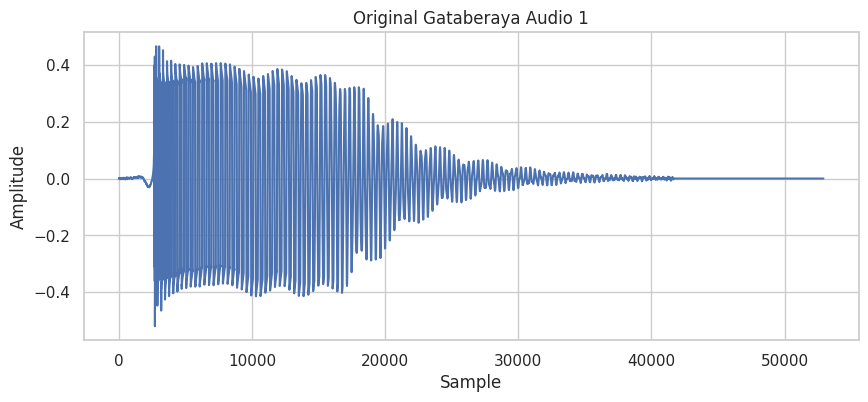

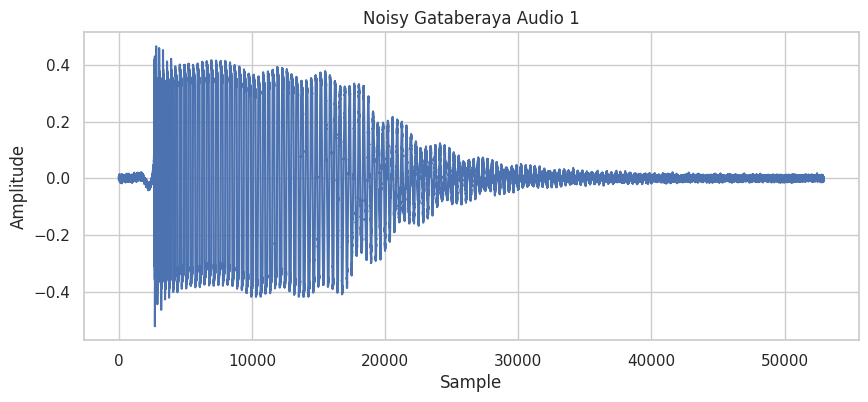

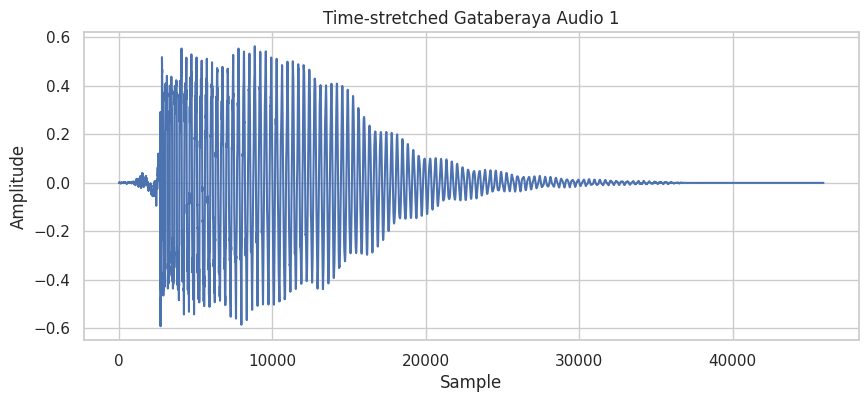

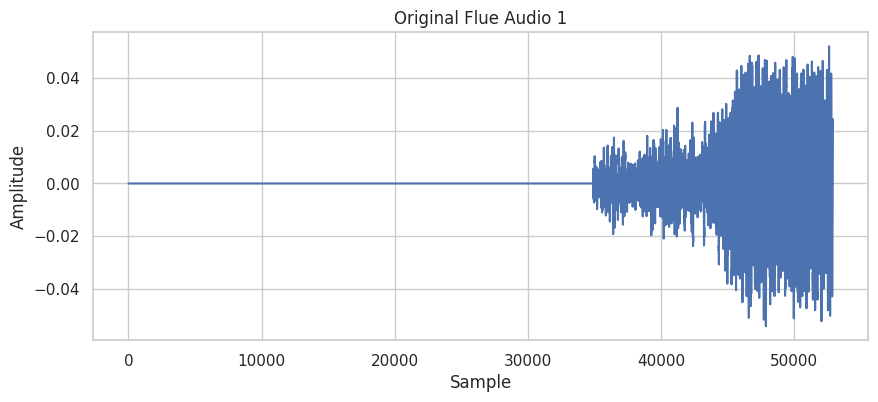

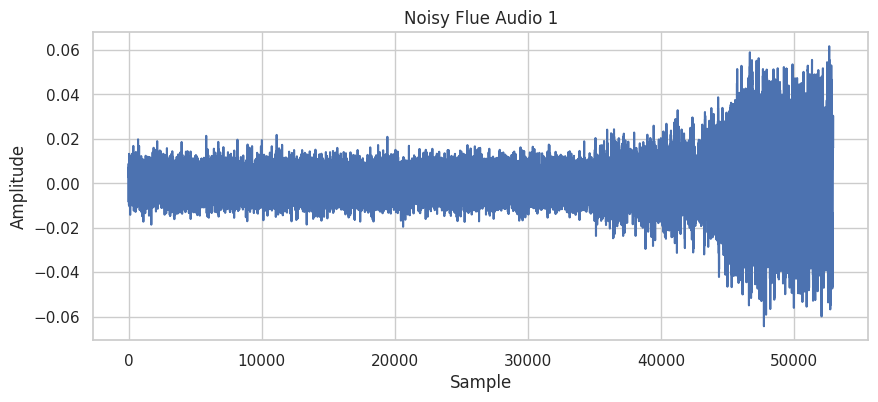

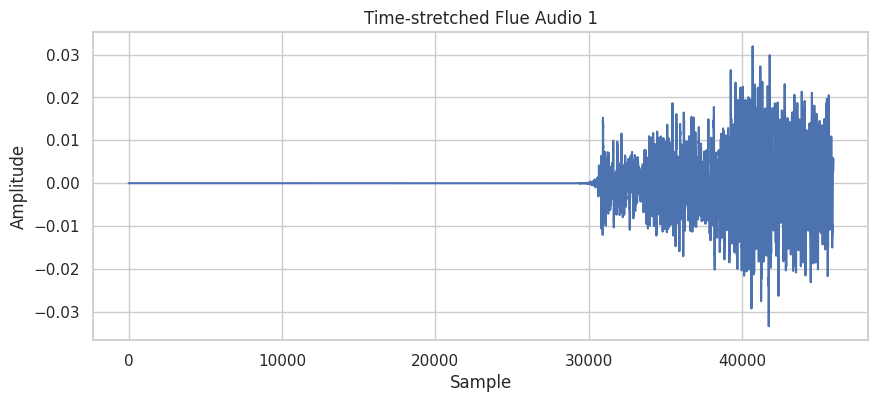

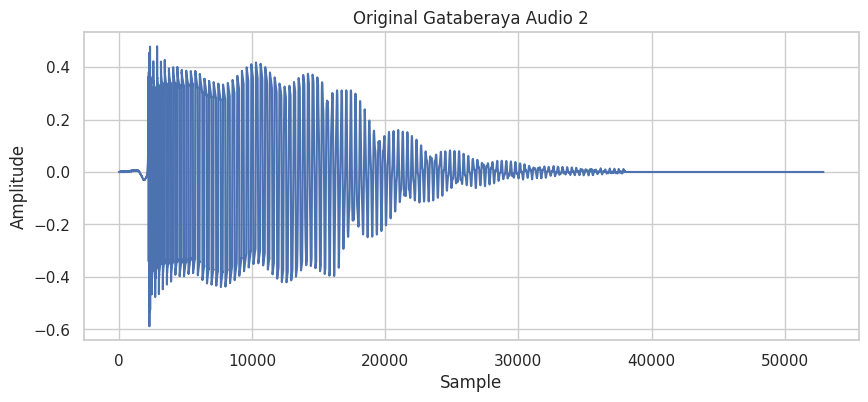

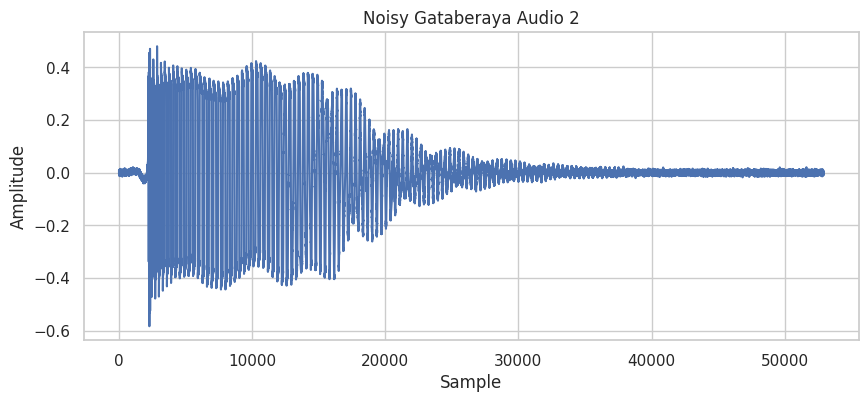

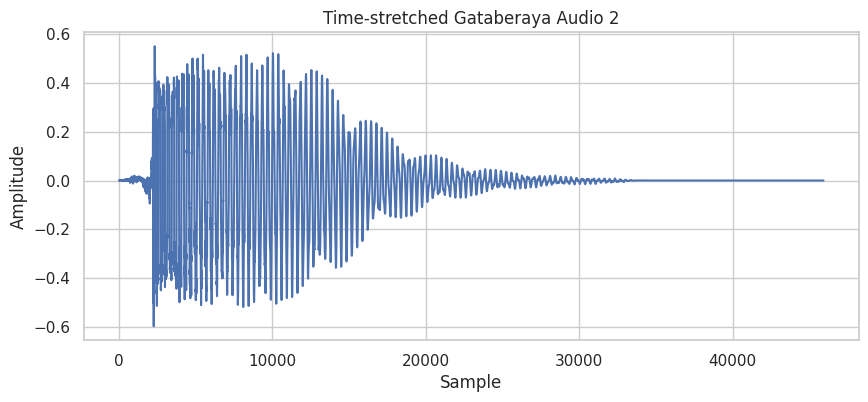

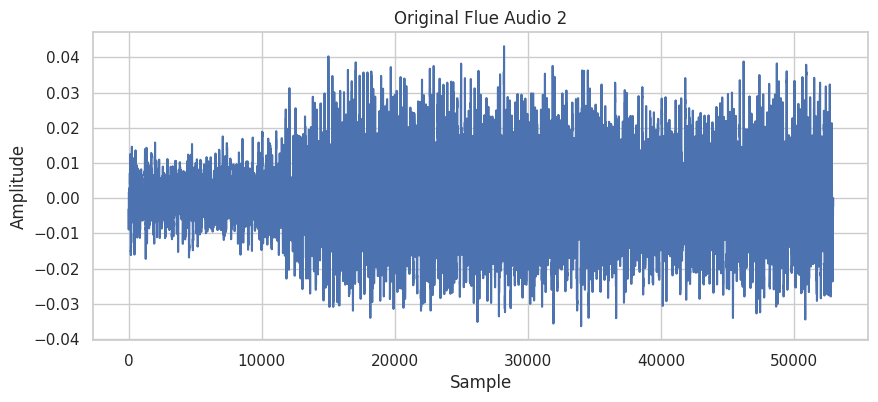

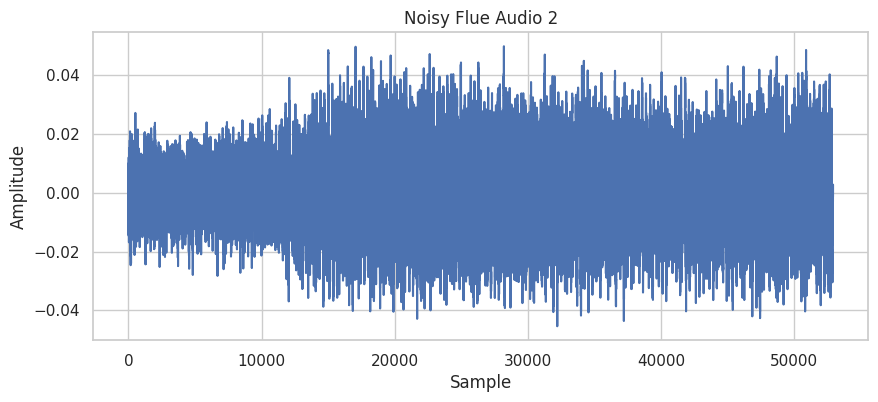

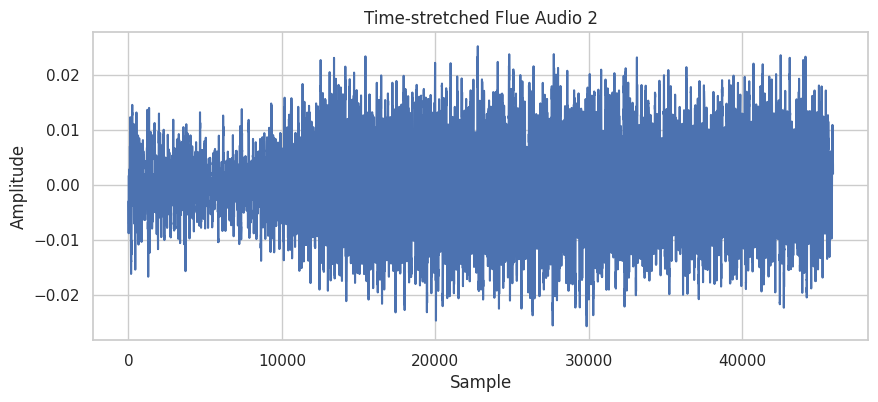

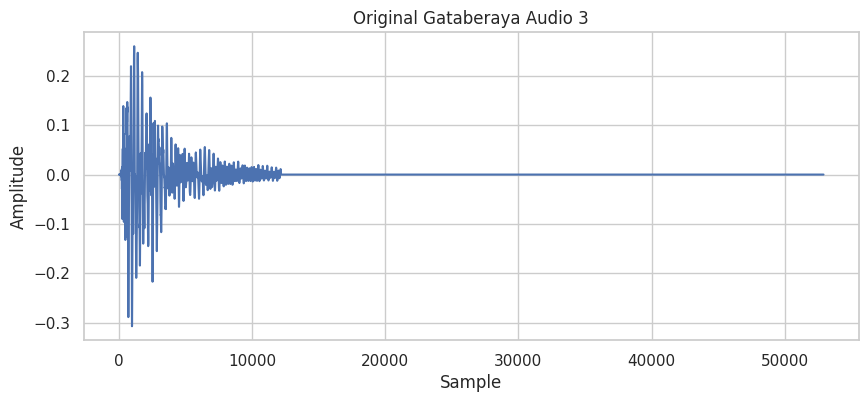

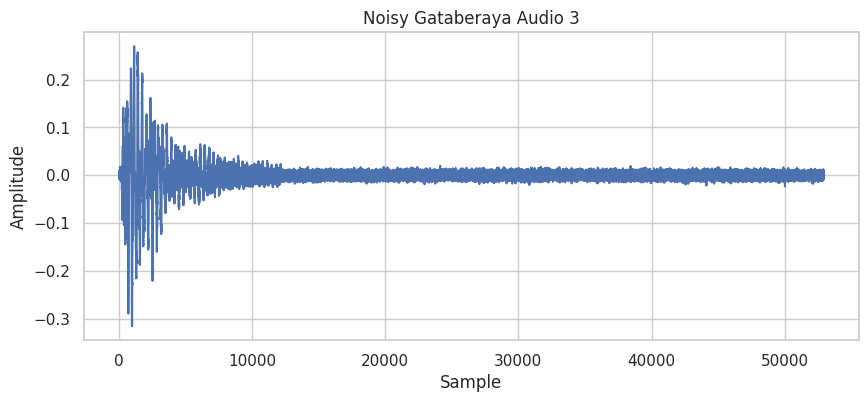

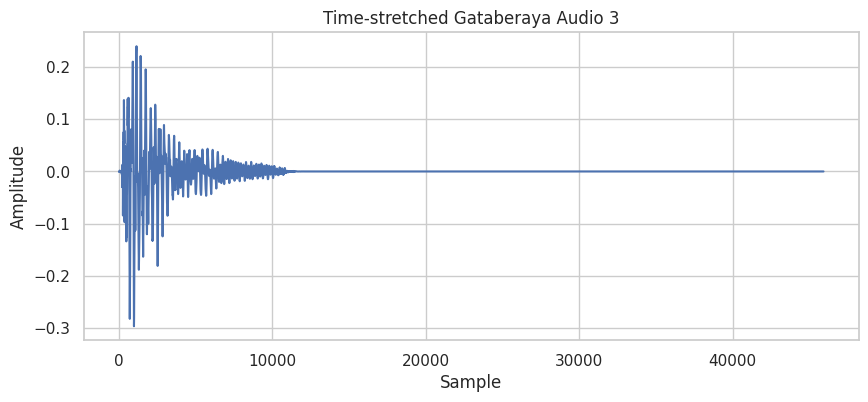

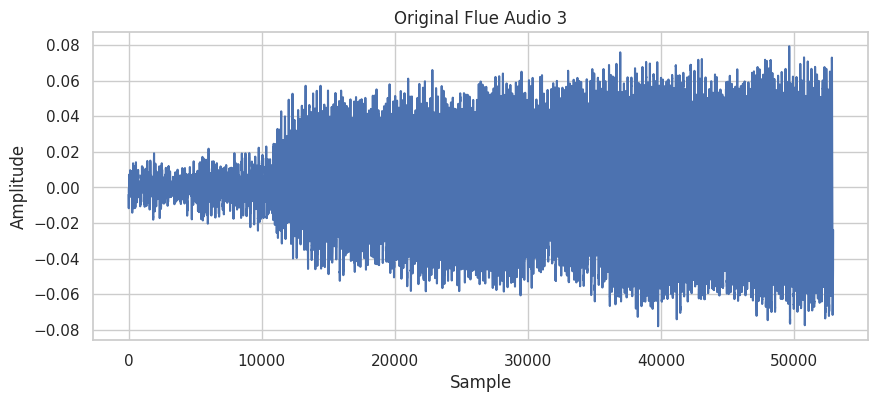

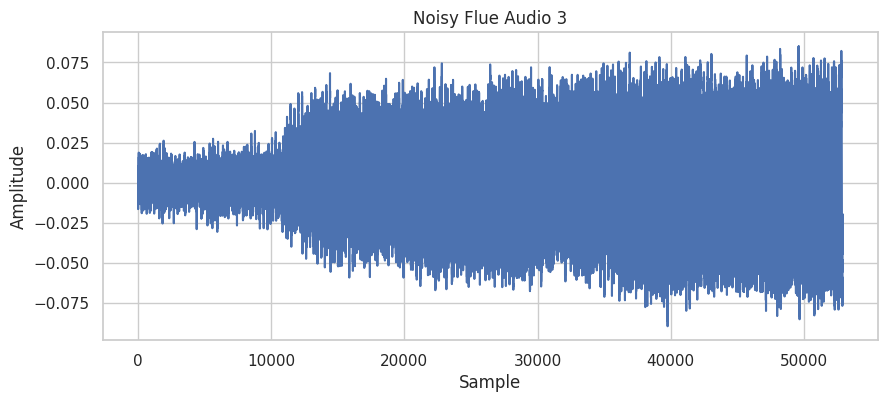

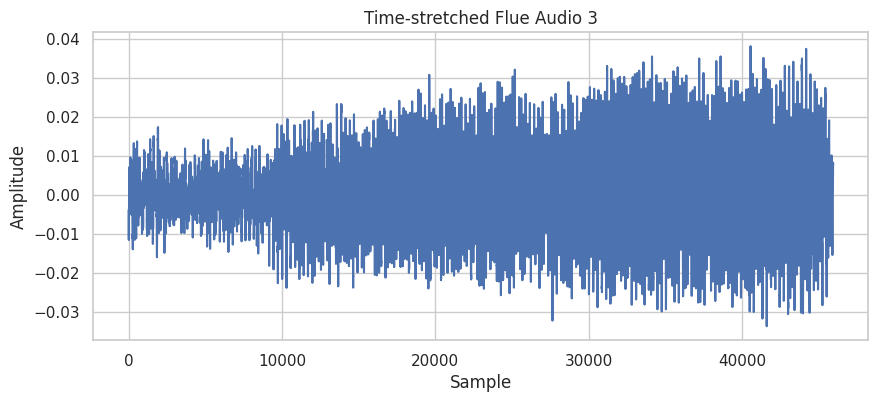

In [ ]:
import matplotlib.pyplot as plt

# Function to plot waveform
def plot_waveform(audio_data, title):
    plt.figure(figsize=(10, 4))
    plt.plot(audio_data)
    plt.title(title)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()

# Plot the waveforms for a few selected files
num_files_to_plot = 3

# Plot original, noisy, and time-stretched versions of the selected files
for i in range(num_files_to_plot):
    # Plot original Gataberaya audio file
    plot_waveform(combined_gataberaya_audio[i], f'Original Gataberaya Audio {i+1}')

    # Plot noisy Gataberaya audio file
    plot_waveform(noisy_combined_gataberaya_audio[i], f'Noisy Gataberaya Audio {i+1}')

    # Plot time-stretched Gataberaya audio file
    plot_waveform(stretched_combined_gataberaya_audio[i], f'Time-stretched Gataberaya Audio {i+1}')

    # Plot original Flue audio file
    plot_waveform(flue_same_audio[i], f'Original Flue Audio {i+1}')

    # Plot noisy Flue audio file
    plot_waveform(noisy_flue_audio[i], f'Noisy Flue Audio {i+1}')

    # Plot time-stretched Flue audio file
    plot_waveform(stretched_combined_flue_audio[i], f'Time-stretched Flue Audio {i+1}')


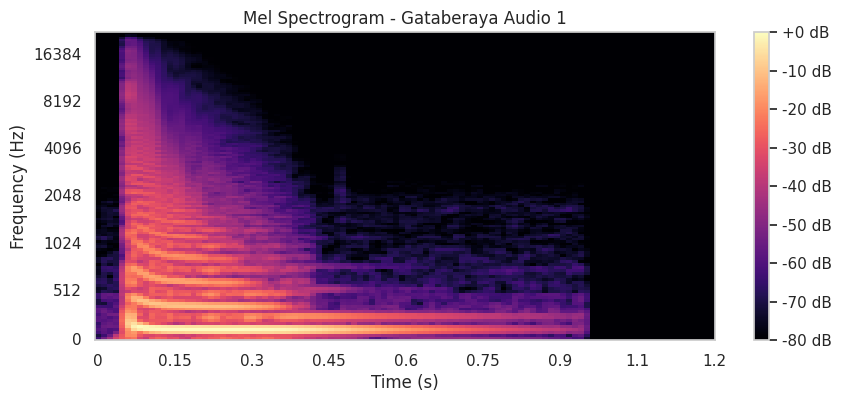

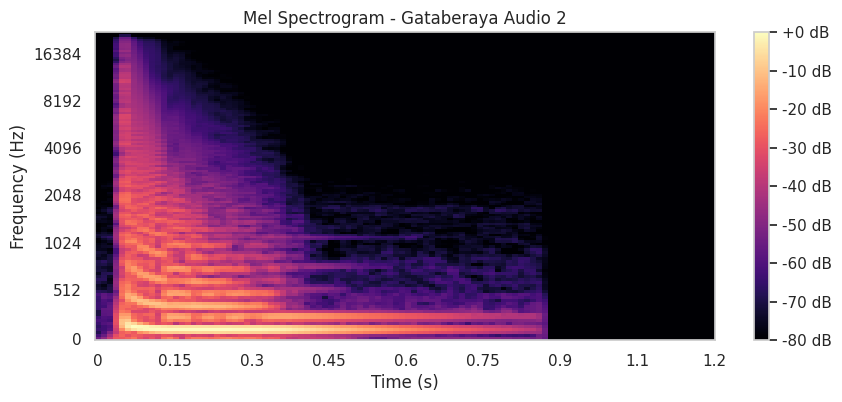

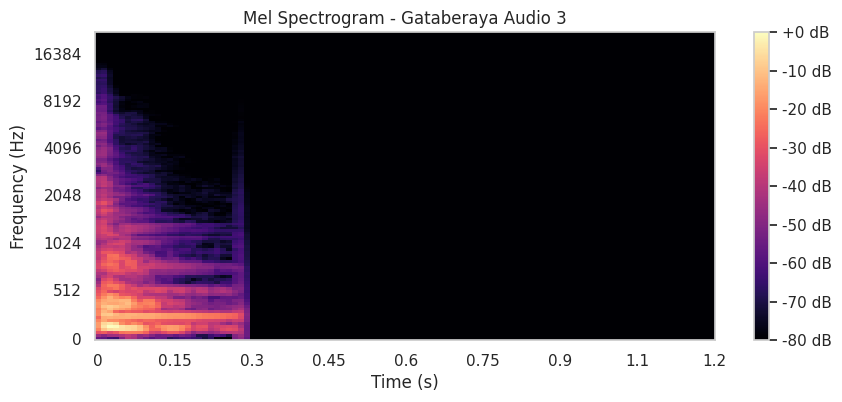

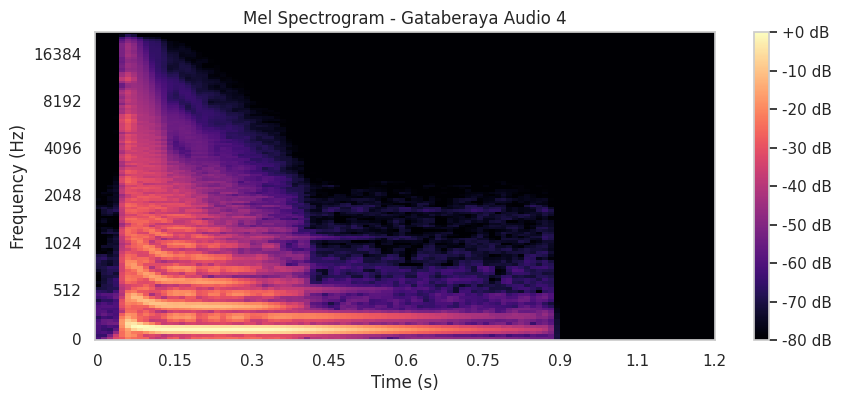

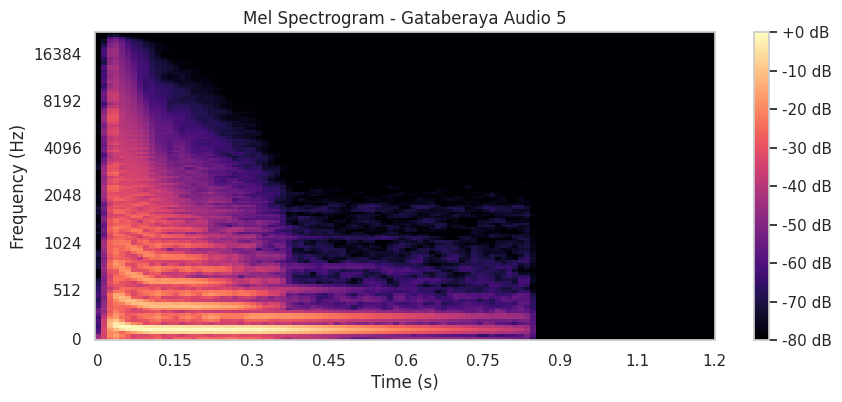

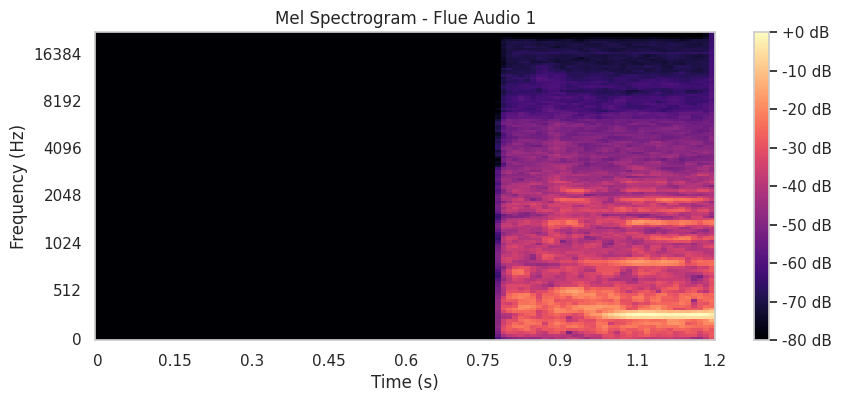

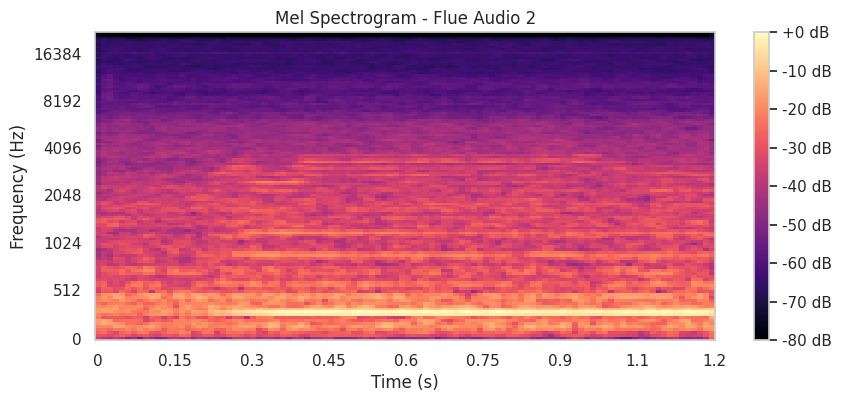

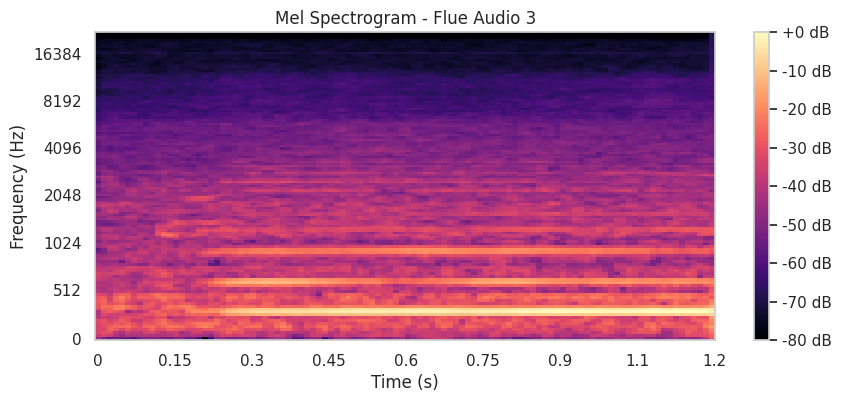

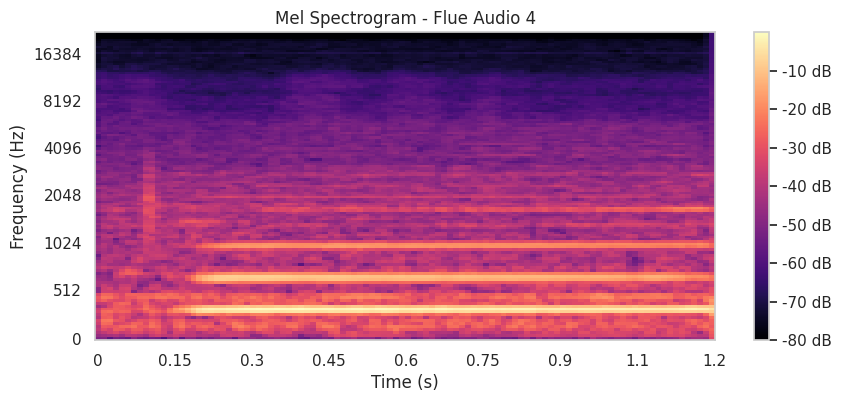

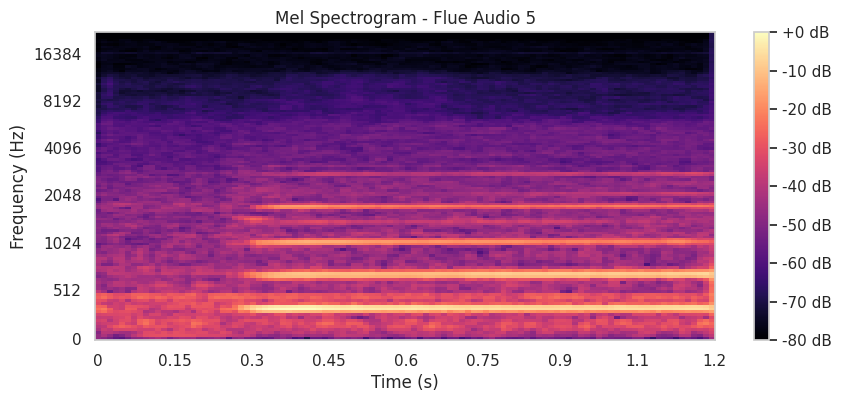

In [ ]:
# Function to compute Mel spectrogram
def compute_mel_spectrogram(audio_data, sr):
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr)
    return librosa.power_to_db(mel_spectrogram, ref=np.max)

# Plot Mel spectrograms for a few selected files from combined_stretched_gataberaya_audio
num_files_to_plot = 5

for i in range(num_files_to_plot):
    # Compute Mel spectrogram for the current file
    mel_spectrogram = compute_mel_spectrogram(combined_stretched_gataberaya_audio[i], sr)

    # Plot Mel spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel Spectrogram - Gataberaya Audio {i+1}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

# Plot Mel spectrograms for a few selected files from combined_stretched_flue_audio
for i in range(num_files_to_plot):
    # Compute Mel spectrogram for the current file
    mel_spectrogram = compute_mel_spectrogram(combined_stretched_flue_audio[i], sr)

    # Plot Mel spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel Spectrogram - Flue Audio {i+1}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()


In [ ]:
import random
import numpy as np

# Function to apply frequency masking to Mel spectrograms
def apply_frequency_mask(mel_spectrogram, num_masks=1, mask_width=10):
    masked_mel_spectrogram = mel_spectrogram.copy()
    freq_bins = mel_spectrogram.shape[0]

    for _ in range(num_masks):
        # Randomly choose the frequency range to mask
        start_freq = random.randint(0, freq_bins - mask_width - 1)
        end_freq = start_freq + mask_width

        # Apply the mask
        masked_mel_spectrogram[start_freq:end_freq, :] = np.min(masked_mel_spectrogram)

    return masked_mel_spectrogram

# Apply frequency masking and add the masked spectrograms to combined_stretched_gataberaya_audio
masked_gataberaya_spectrograms = [apply_frequency_mask(compute_mel_spectrogram(audio, sr))
                                 for audio in combined_stretched_gataberaya_audio]

# Apply frequency masking and add the masked spectrograms to combined_stretched_flue_audio
masked_flue_spectrograms = [apply_frequency_mask(compute_mel_spectrogram(audio, sr))
                           for audio in combined_stretched_flue_audio]

# Add the masked spectrograms to the existing lists
combined_stretched_gataberaya_audio.extend(masked_gataberaya_spectrograms)
combined_stretched_flue_audio.extend(masked_flue_spectrograms)

# Print the counts after adding frequency-masked spectrograms
print("Count of combined_stretched_gataberaya_audio after adding masked spectrograms:", len(combined_stretched_gataberaya_audio))
print("Count of combined_stretched_flue_audio after adding masked spectrograms:", len(combined_stretched_flue_audio))


Count of combined_stretched_gataberaya_audio after adding masked spectrograms: 1408
Count of combined_stretched_flue_audio after adding masked spectrograms: 1408


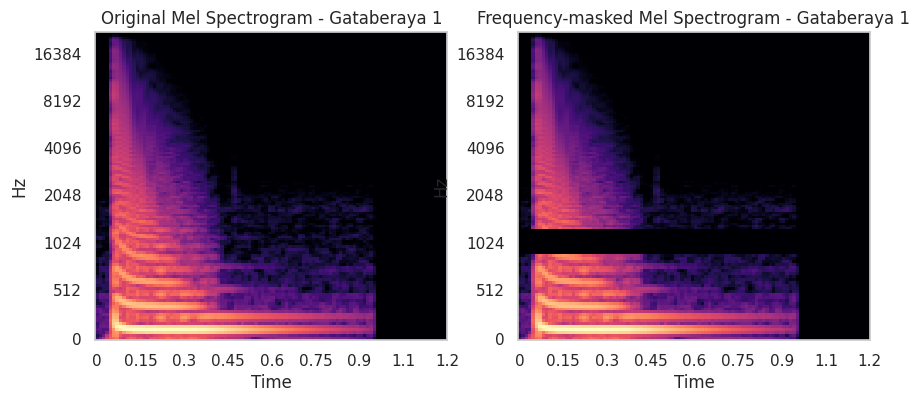

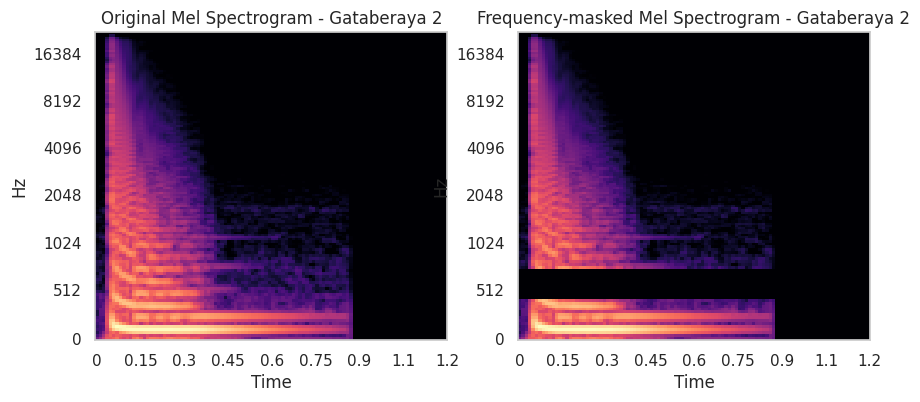

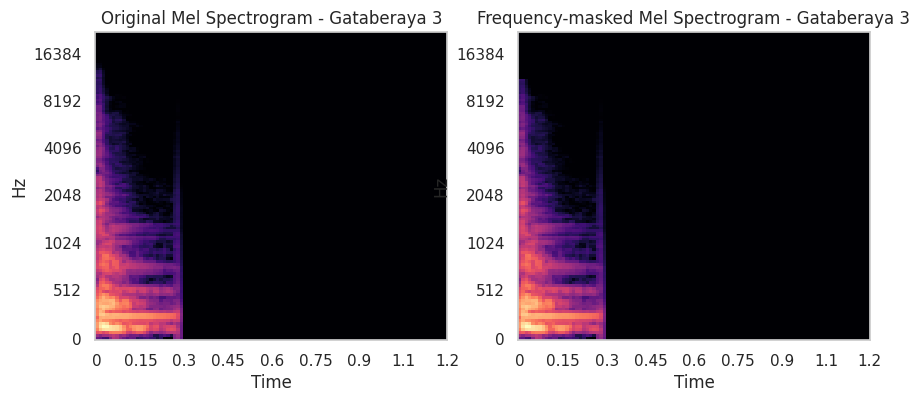

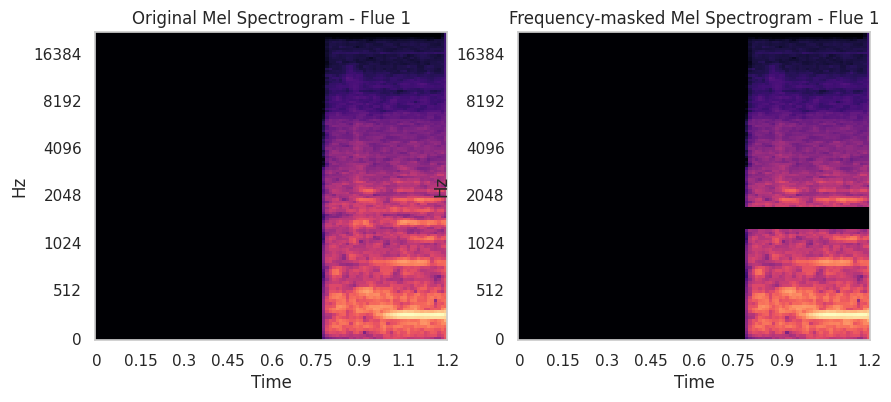

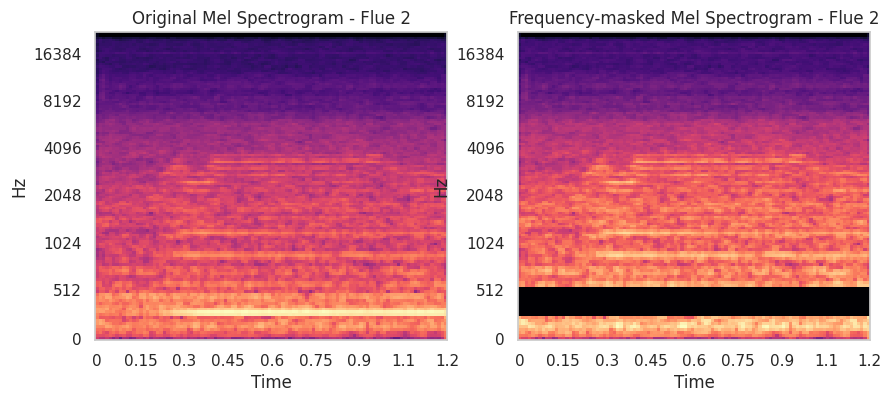

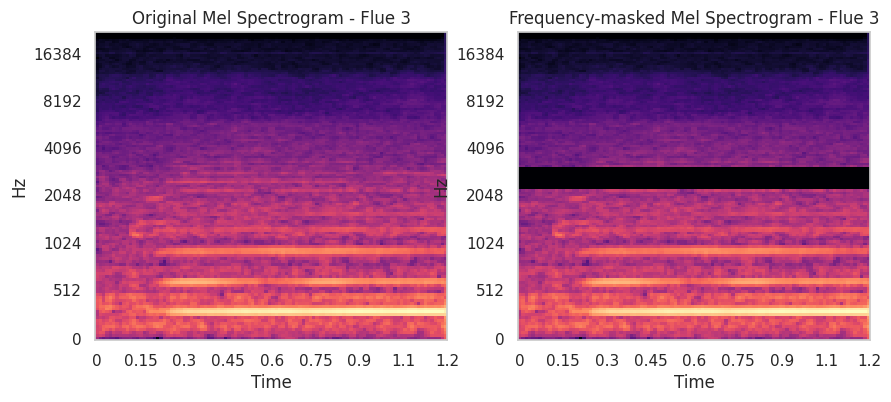

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

# Number of examples to plot for each class
num_to_plot = 3

# Plot original and frequency-masked Mel spectrograms for Gataberaya
for i in range(num_to_plot):
    # Original Gataberaya spectrogram
    original_mel = compute_mel_spectrogram(combined_stretched_gataberaya_audio[i], sr)

    # Frequency-masked Gataberaya spectrogram
    frequency_masked_mel = apply_frequency_mask(original_mel)

    # Plot side-by-side
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    # Original spectrogram
    librosa.display.specshow(original_mel, sr=sr, x_axis='time', y_axis='mel', ax=ax[0])
    ax[0].set(title=f'Original Mel Spectrogram - Gataberaya {i+1}')

    # Frequency-masked spectrogram
    librosa.display.specshow(frequency_masked_mel, sr=sr, x_axis='time', y_axis='mel', ax=ax[1])
    ax[1].set(title=f'Frequency-masked Mel Spectrogram - Gataberaya {i+1}')

    plt.show()

# Plot original and frequency-masked Mel spectrograms for Flue
for i in range(num_to_plot):
    # Original Flue spectrogram
    original_mel = compute_mel_spectrogram(combined_stretched_flue_audio[i], sr)

    # Frequency-masked Flue spectrogram
    frequency_masked_mel = apply_frequency_mask(original_mel)

    # Plot side-by-side
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    # Original spectrogram
    librosa.display.specshow(original_mel, sr=sr, x_axis='time', y_axis='mel', ax=ax[0])
    ax[0].set(title=f'Original Mel Spectrogram - Flue {i+1}')

    # Frequency-masked spectrogram
    librosa.display.specshow(frequency_masked_mel, sr=sr, x_axis='time', y_axis='mel', ax=ax[1])
    ax[1].set(title=f'Frequency-masked Mel Spectrogram - Flue {i+1}')

    plt.show()


In [ ]:
import random
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Function to apply time masking to Mel spectrograms
def apply_time_mask(mel_spectrogram, num_masks=1, mask_width=10):
    masked_mel_spectrogram = mel_spectrogram.copy()
    time_steps = mel_spectrogram.shape[1]

    for _ in range(num_masks):
        # Randomly choose the time range to mask
        start_time = random.randint(0, time_steps - mask_width - 1)
        end_time = start_time + mask_width

        # Apply the mask
        masked_mel_spectrogram[:, start_time:end_time] = np.min(masked_mel_spectrogram)

    return masked_mel_spectrogram

# Apply time masking and add to the spectrograms for combined_stretched_gataberaya_audio
time_masked_gataberaya_spectrograms = [
    apply_time_mask(compute_mel_spectrogram(audio, sr)) for audio in combined_stretched_gataberaya_audio
]

# Apply time masking and add to the spectrograms for combined_stretched_flue_audio
time_masked_flue_spectrograms = [
    apply_time_mask(compute_mel_spectrogram(audio, sr)) for audio in combined_stretched_flue_audio
]

# Add the time-masked spectrograms to the existing lists
combined_stretched_gataberaya_audio.extend(time_masked_gataberaya_spectrograms)
combined_stretched_flue_audio.extend(time_masked_flue_spectrograms)

# Get the counts after adding time-masked spectrograms
count_combined_gataberaya = len(combined_stretched_gataberaya_audio)
count_combined_flue = len(combined_stretched_flue_audio)

print("Count of combined_stretched_gataberaya_audio after adding time-masked spectrograms:", count_combined_gataberaya)
print("Count of combined_stretched_flue_audio after adding time-masked spectrograms:", count_combined_flue)


Count of combined_stretched_gataberaya_audio after adding time-masked spectrograms: 2816
Count of combined_stretched_flue_audio after adding time-masked spectrograms: 2816


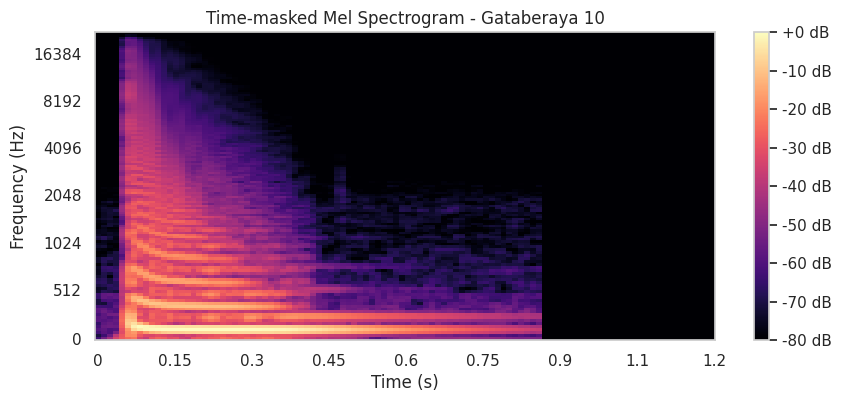

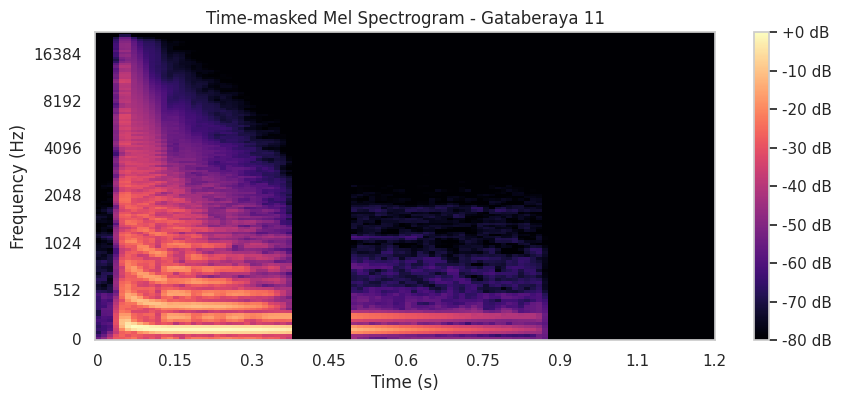

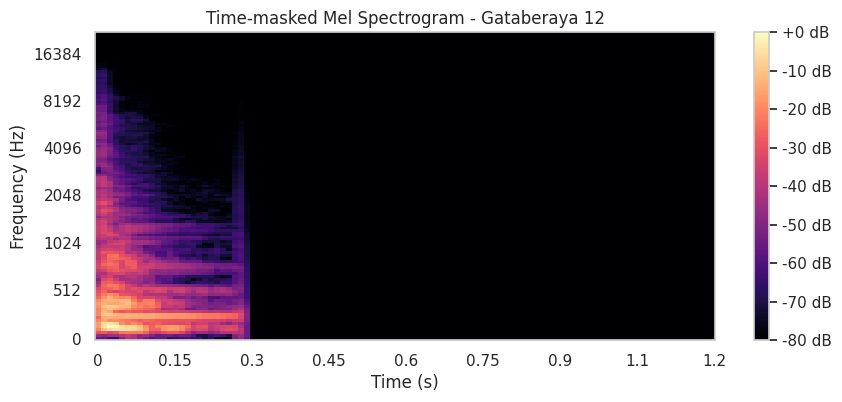

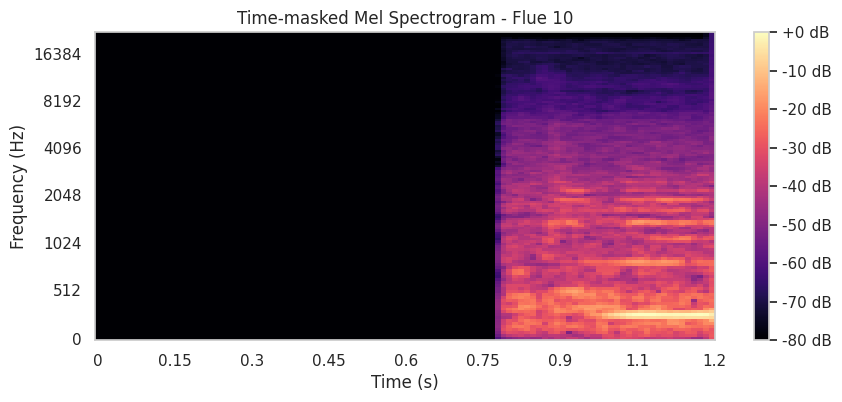

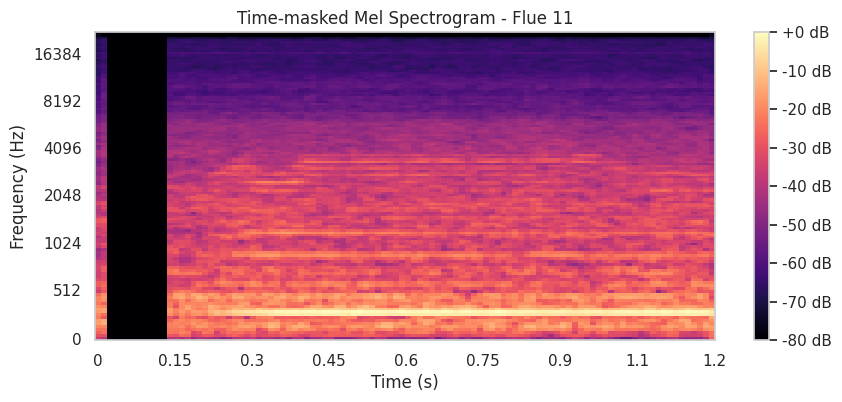

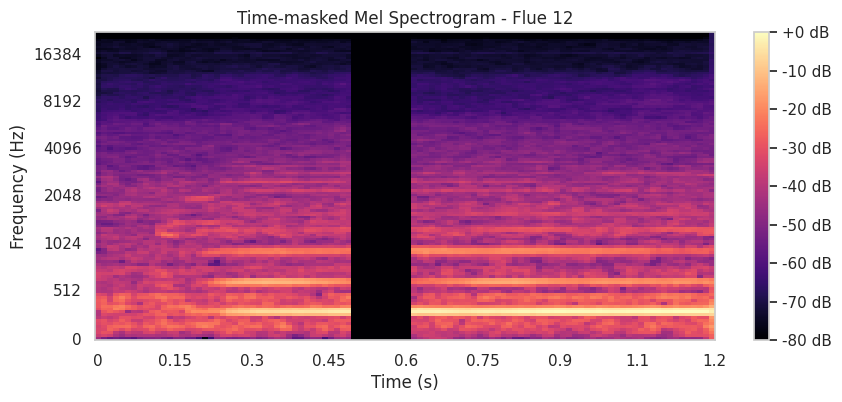

In [ ]:
# Plot examples of time-masked spectrograms
num_to_plot = 3  # Change this value to plot more or fewer examples

# Plot examples for Gataberaya
for i in range(num_to_plot):
    time_masked_mel = time_masked_gataberaya_spectrograms[i]

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(time_masked_mel, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Time-masked Mel Spectrogram - Gataberaya {i+10}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

# Plot examples for Flue
for i in range(num_to_plot):
    time_masked_mel = time_masked_flue_spectrograms[i]

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(time_masked_mel, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Time-masked Mel Spectrogram - Flue {i+10}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

In [ ]:
# Get the shapes of spectrograms in combined_stretched_gataberaya_audio
gataberaya_shapes = [spec.shape for spec in combined_stretched_gataberaya_audio]

# Get the shapes of spectrograms in combined_stretched_flue_audio
flue_shapes = [spec.shape for spec in combined_stretched_flue_audio]

# Display the unique shapes for both sets
unique_gataberaya_shapes = set(gataberaya_shapes)
unique_flue_shapes = set(flue_shapes)

print("Unique shapes in combined_stretched_gataberaya_audio:", unique_gataberaya_shapes)
print("Unique shapes in combined_stretched_flue_audio:", unique_flue_shapes)

# Display the first few shapes to check for consistency
print("First 5 shapes in combined_stretched_gataberaya_audio:", gataberaya_shapes[:5])
print("First 5 shapes in combined_stretched_flue_audio:", flue_shapes[:5])


Unique shapes in combined_stretched_gataberaya_audio: {(45929,), (128, 104), (128, 128, 1), (128, 90), (52920,)}
Unique shapes in combined_stretched_flue_audio: {(45929,), (128, 104), (128, 128, 1), (128, 90), (52920,)}
First 5 shapes in combined_stretched_gataberaya_audio: [(52920,), (52920,), (52920,), (52920,), (52920,)]
First 5 shapes in combined_stretched_flue_audio: [(52920,), (52920,), (52920,), (52920,), (52920,)]


In [ ]:
# Function to check if an array represents raw audio (1D)
def is_raw_audio(data):
    return len(data.shape) == 1

# Identify raw audio data from the existing lists
raw_gataberaya = [data for data in combined_stretched_gataberaya_audio if is_raw_audio(data)]
raw_flue = [data for data in combined_stretched_flue_audio if is_raw_audio(data)]


In [ ]:
# Define parameters for Mel spectrogram
sample_rate = 44100  # Common sample rate for audio
n_mels = 128  # Number of Mel bands
fmax = None  # Maximum frequency for Mel bands, set to None for Nyquist frequency

# Function to convert raw audio to Mel spectrogram
def convert_to_mel_spectrogram(audio_data, sr):
    # Compute Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=n_mels, fmax=fmax)
    # Convert to decibels (dB)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    return mel_spectrogram_db

# Convert raw audio data to Mel spectrograms
converted_gataberaya = [convert_to_mel_spectrogram(data, sample_rate) for data in raw_gataberaya]
converted_flue = [convert_to_mel_spectrogram(data, sample_rate) for data in raw_flue]


In [ ]:
# Remove raw audio data from the original lists
cleaned_gataberaya = [spec for spec in combined_stretched_gataberaya_audio if not is_raw_audio(spec)]
cleaned_flue = [spec for spec in combined_stretched_flue_audio if not is_raw_audio(spec)]

# Append the converted Mel spectrograms to the cleaned lists
cleaned_gataberaya.extend(converted_gataberaya)
cleaned_flue.extend(converted_flue)


In [ ]:
# Check shapes after converting raw audio to Mel spectrograms
gataberaya_shapes = [spec.shape for spec in cleaned_gataberaya]
flue_shapes = [spec.shape for spec in cleaned_flue]

print("Unique shapes in cleaned_gataberaya_audio after conversion:", set(gataberaya_shapes))
print("Unique shapes in cleaned_flue_audio after conversion:", set(flue_shapes))


Unique shapes in cleaned_gataberaya_audio after conversion: {(128, 104), (128, 128, 1), (128, 90)}
Unique shapes in cleaned_flue_audio after conversion: {(128, 104), (128, 128, 1), (128, 90)}


##Flatten the Spectrogram to 2D


In [ ]:
# Flatten any 3D spectrograms to 2D
flattened_gataberaya = [
    spec.squeeze() if len(spec.shape) > 2 else spec for spec in cleaned_gataberaya
]

flattened_flue = [
    spec.squeeze() if len(spec.shape) > 2 else spec for spec in cleaned_flue
]


##Standardize the Shape

In [ ]:
# Function to standardize spectrogram shape to a target
def standardize_shape(spectrogram, target_shape=(128, 181)):
    # Get current shape
    current_shape = spectrogram.shape

    # Padding for height
    pad_top = (target_shape[0] - current_shape[0]) // 2
    pad_bottom = target_shape[0] - current_shape[0] - pad_top

    # Padding for width
    pad_left = (target_shape[1] - current_shape[1]) // 2
    pad_right = target_shape[1] - current_shape[1] - pad_left

    # Apply padding (if required)
    spectrogram = np.pad(
        spectrogram,
        ((pad_top, pad_bottom), (pad_left, pad_right)),
        mode='constant',
        constant_values=(0, 0),
    )

    # Ensure it's cropped to exact target shape (safety net)
    spectrogram = spectrogram[:target_shape[0], :target_shape[1]]

    return spectrogram

# Standardize both Gataberaya and Flue datasets to the target shape
standardized_gataberaya = [standardize_shape(spec) for spec in flattened_gataberaya]
standardized_flue = [standardize_shape(spec) for spec in flattened_flue]


In [ ]:
import numpy as np

def standardize_shape(spectrogram, target_shape=(128, 181)):
    current_shape = spectrogram.shape

    # Determine padding or cropping for height
    if current_shape[0] < target_shape[0]:
        pad_top = (target_shape[0] - current_shape[0]) // 2
        pad_bottom = target_shape[0] - current_shape[0] - pad_top
    else:
        pad_top = pad_bottom = 0

    # Determine padding or cropping for width
    if current_shape[1] < target_shape[1]:
        pad_left = (target_shape[1] - current_shape[1]) // 2
        pad_right = target_shape[1] - current_shape[1] - pad_left
    else:
        pad_left = pad_right = 0

    # Apply padding
    spectrogram = np.pad(
        spectrogram,
        ((pad_top, pad_bottom), (pad_left, pad_right)),
        mode='constant',
        constant_values=(0, 0),
    )

    # Crop to the exact target shape if necessary
    spectrogram = spectrogram[:target_shape[0], :target_shape[1]]

    return spectrogram

# Standardize both Gataberaya and Flue datasets to the target shape
standardized_gataberaya = [standardize_shape(spec) for spec in flattened_gataberaya]
standardized_flue = [standardize_shape(spec) for spec in flattened_flue]


##Verify the Shapes

In [ ]:
# Get the unique shapes after standardization
gataberaya_unique_shapes = {spec.shape for spec in standardized_gataberaya}
flue_unique_shapes = {spec.shape for spec in standardized_flue}

print("Unique shapes in standardized_gataberaya:", gataberaya_unique_shapes)
print("Unique shapes in standardized_flue:", flue_unique_shapes)


Unique shapes in standardized_gataberaya: {(128, 181)}
Unique shapes in standardized_flue: {(128, 181)}


##Prepare the Data

In [ ]:
# Assuming standardized_flue and standardized_gataberaya are the lists of spectrograms
num_standardized_flue = len(standardized_flue)
num_standardized_gataberaya = len(standardized_gataberaya)

print("Number of items in standardized_flue:", num_standardized_flue)
print("Number of items in standardized_gataberaya:", num_standardized_gataberaya)


Number of items in standardized_flue: 2816
Number of items in standardized_gataberaya: 2816


In [ ]:
test_size = 0.50
min_required_size = 2 * test_size * len(X)
min_required_size


321.0

##Model Building

In [ ]:
# Install TensorFlow if needed
!pip install tensorflow


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X = np.array(standardized_gataberaya + standardized_flue)
y = np.array([1] * len(standardized_gataberaya) + [0] * len(standardized_flue))


In [ ]:
print("Shape of X (spectrograms):", X.shape)
print("Shape of y (labels):", y.shape)

Shape of X (spectrograms): (5632, 128, 181)
Shape of y (labels): (5632,)


In [ ]:
# Initial split: 80% training, 20% rest (which will be further split)
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.30, random_state=42)

# Split the rest into validation (10%) and testing (10%)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.50, random_state=42)

# Adjust the test size to 10% of the original dataset size
test_size = int(0.10 * len(X))
X_test, X_val, y_test, y_val = train_test_split(X_rest, y_rest, test_size=test_size, random_state=42)

# Confirm the sizes of each dataset
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))


Training set size: 3942
Validation set size: 563
Testing set size: 1127


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


Epoch 1/100
124/124 [==============================] - 134s 1s/step - loss: 4.3300 - accuracy: 0.8450 - val_loss: 0.0791 - val_accuracy: 0.9876
Epoch 2/100
124/124 [==============================] - 139s 1s/step - loss: 0.0497 - accuracy: 0.9850 - val_loss: 0.0691 - val_accuracy: 0.9734
Epoch 3/100
124/124 [==============================] - 137s 1s/step - loss: 0.0725 - accuracy: 0.9744 - val_loss: 0.0698 - val_accuracy: 0.9769
Epoch 4/100
124/124 [==============================] - 131s 1s/step - loss: 0.0585 - accuracy: 0.9792 - val_loss: 0.0392 - val_accuracy: 0.9840
Epoch 5/100
124/124 [==============================] - 141s 1s/step - loss: 0.0337 - accuracy: 0.9876 - val_loss: 0.0148 - val_accuracy: 0.9947
Epoch 6/100
124/124 [==============================] - 137s 1s/step - loss: 0.0159 - accuracy: 0.9954 - val_loss: 0.0262 - val_accuracy: 0.9911
Epoch 7/100
124/124 [==============================] - 138s 1s/step - loss: 0.0163 - accuracy: 0.9939 - val_loss: 0.0040 - val_accuracy:

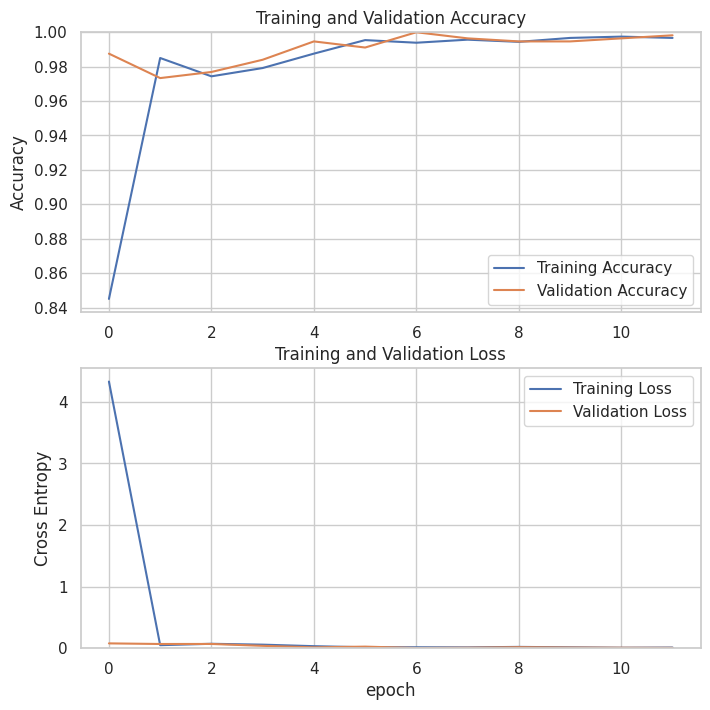

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Concatenate, UpSampling2D
from tensorflow.keras.models import Model

input_layer = Input(shape=(128, 181, 1))

from tensorflow import keras


model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 181, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.05),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.05),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Add Early Stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Assuming X_train, X_val, X_test, y_train, y_val, and y_test are already defined and preprocessed
# Train the model with early stopping and mini-batch gradient descent
batch_size = 32
history = model.fit(X_train, y_train, epochs=100,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:\n', cm)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc_prc = auc(recall, precision)
print('AUC-PRC:', auc_prc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_roc = auc(fpr, tpr)
print('AUC-ROC:', auc_roc)

# Plot Learning Curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Save the model
model.save('classification_model.h5')


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 179, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 63, 89, 32)        0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 63, 89, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 30, 43, 64)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 30, 43, 64)       

Confusion Matrix:
 [[536   3]
 [  0 588]]


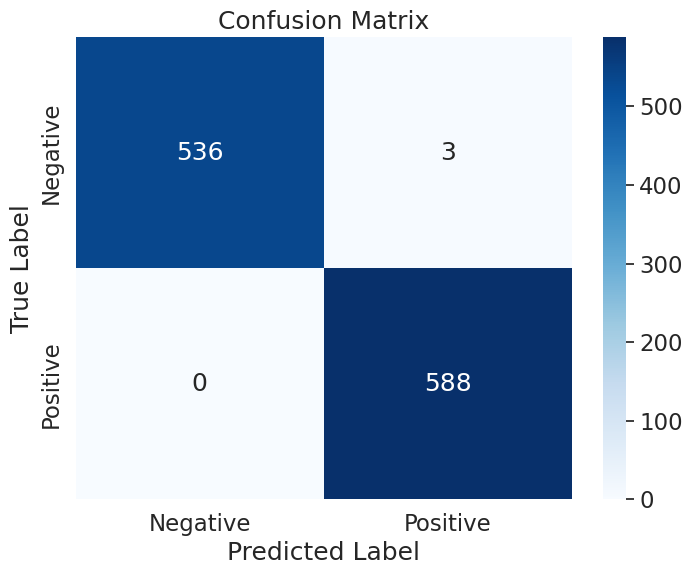

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:\n', cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


AUC-PRC: 0.9999328157198029


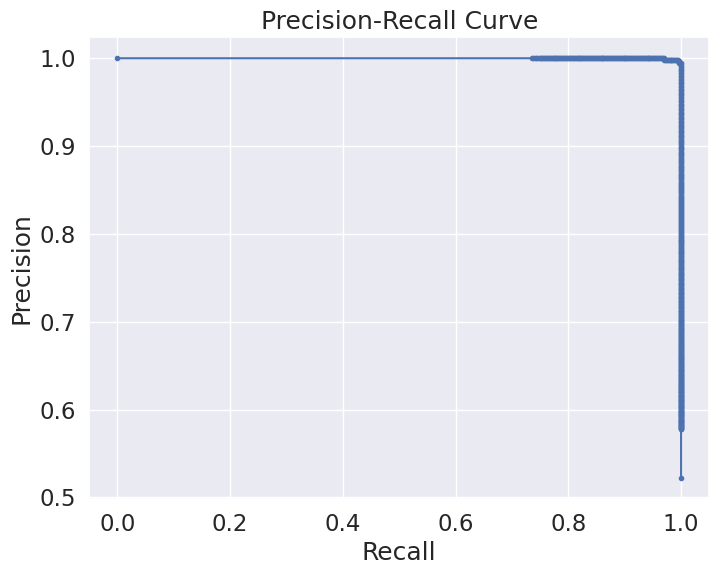

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc_prc = auc(recall, precision)
print('AUC-PRC:', auc_prc)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


AUC-ROC: 0.9999274292277208


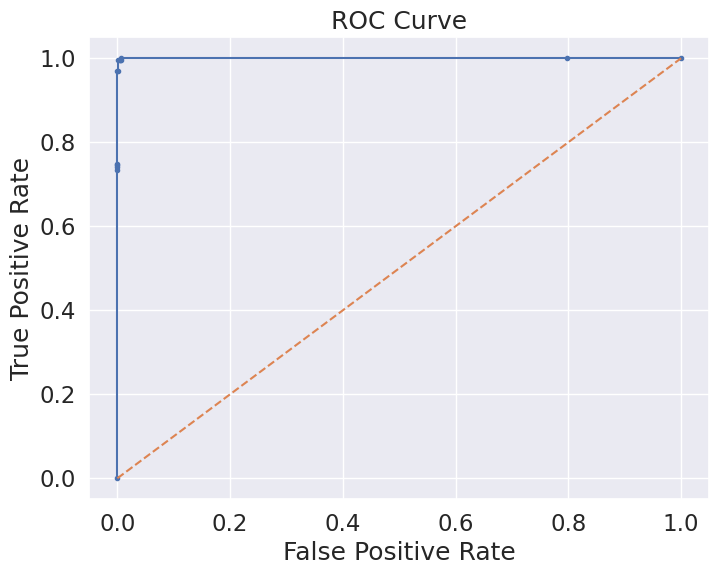

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_roc = auc(fpr, tpr)
print('AUC-ROC:', auc_roc)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.show()


In [ ]:
# Save the model
model.save('classification_model.h5')

Audio waveform:


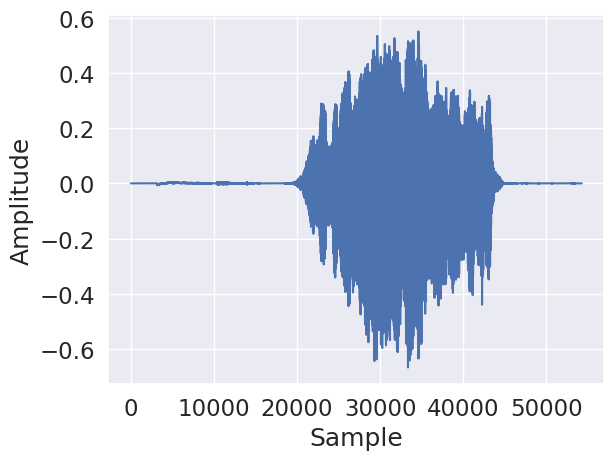

Converting sampling rate from 16000 to 44100...
1/1 [==============================] - 0s 104ms/step
Prediction: Flute


In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Load the trained model
model = load_model('classification_model.h5')

# Function to preprocess audio
def preprocess_audio(audio_path):
    try:
        # Load audio file
        y, sr = librosa.load(audio_path, sr=None)

        # Display the audio waveform
        print("Audio waveform:")
        plt.plot(y)
        plt.xlabel('Sample')
        plt.ylabel('Amplitude')
        plt.show()

        # Check if the audio is stereo and convert to mono
        if y.ndim > 1:
            print("Converting stereo to mono...")
            y = np.mean(y, axis=1)

        # Check the sampling rate and resample if needed
        if sr != 44100:
            print(f"Converting sampling rate from {sr} to 44100...")
            y = librosa.resample(y, orig_sr=sr, target_sr=44100)
            sr = 44100

        # Set the length to 2.1 seconds (92610 samples)
        target_length = 92610
        if len(y) < target_length:
            y = np.pad(y, (0, target_length - len(y)))
        elif len(y) > target_length:
            y = y[:target_length]

        # Convert to mel spectrograms
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
        mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

        return mel_spec
    except Exception as e:
        print(f"Error processing {audio_path}: {str(e)}")
        return None

# Function to make predictions
def predict(audio_path):
    try:
        # Preprocess audio
        mel_spec = preprocess_audio(audio_path)

        if mel_spec is not None:
            # Reshape for model input
            mel_spec = np.expand_dims(mel_spec, axis=-1)
            mel_spec = np.expand_dims(mel_spec, axis=0)

            # Get prediction
            prediction = model.predict(mel_spec)

            # Get the predicted class
            if prediction.argmax() == 0:
                return "Flute"
            elif prediction.argmax() == 1:
                return "Gataberaya"
            else:
                return "Unknown"
        else:
            return "Error"
    except Exception as e:
        print(f"Error processing {audio_path}: {str(e)}")
        return "Error"

# Example usage
audio_file = '/content/New Recording 130.wav'
prediction = predict(audio_file)
print("Prediction:", prediction)


Audio waveform:


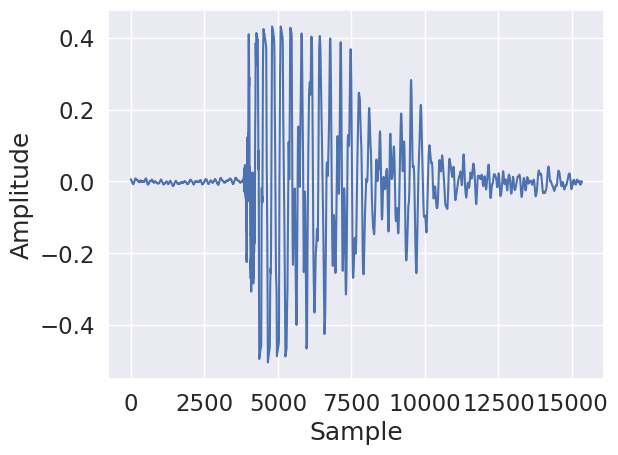

1/1 [==============================] - 0s 90ms/step
Prediction: Flute


In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Load the trained model
model = load_model('classification_model.h5')

# Function to preprocess audio
def preprocess_audio(audio_path):
    try:
        # Load audio file
        y, sr = librosa.load(audio_path, sr=None)

        # Display the audio waveform
        print("Audio waveform:")
        plt.plot(y)
        plt.xlabel('Sample')
        plt.ylabel('Amplitude')
        plt.show()

        # Check if the audio is stereo and convert to mono
        if y.ndim > 1:
            print("Converting stereo to mono...")
            y = np.mean(y, axis=1)

        # Check the sampling rate and resample if needed
        if sr != 44100:
            print(f"Converting sampling rate from {sr} to 44100...")
            y = librosa.resample(y, orig_sr=sr, target_sr=44100)
            sr = 44100

        # Set the length to 2.1 seconds (92610 samples)
        target_length = 92610
        if len(y) < target_length:
            y = np.pad(y, (0, target_length - len(y)))
        elif len(y) > target_length:
            y = y[:target_length]

        # Convert to mel spectrograms
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
        mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

        return mel_spec
    except Exception as e:
        print(f"Error processing {audio_path}: {str(e)}")
        return None

# Function to make predictions
def predict(audio_path):
    try:
        # Preprocess audio
        mel_spec = preprocess_audio(audio_path)

        if mel_spec is not None:
            # Reshape for model input
            mel_spec = np.expand_dims(mel_spec, axis=-1)
            mel_spec = np.expand_dims(mel_spec, axis=0)

            # Get prediction
            prediction = model.predict(mel_spec)

            # Get the predicted class
            if prediction.argmax() == 0:
                return "Flute"
            elif prediction.argmax() == 1:
                return "Gataberaya"
            else:
                return "Unknown"
        else:
            return "Error"
    except Exception as e:
        print(f"Error processing {audio_path}: {str(e)}")
        return "Error"

# Example usage
audio_file = '/content/gataberaya wav for testing.wav'
prediction = predict(audio_file)
print("Prediction:", prediction)


In [ ]:
/content/gdrive/MyDrive/Audio/Beraya /Dom/dom3-2.wav

Audio waveform:


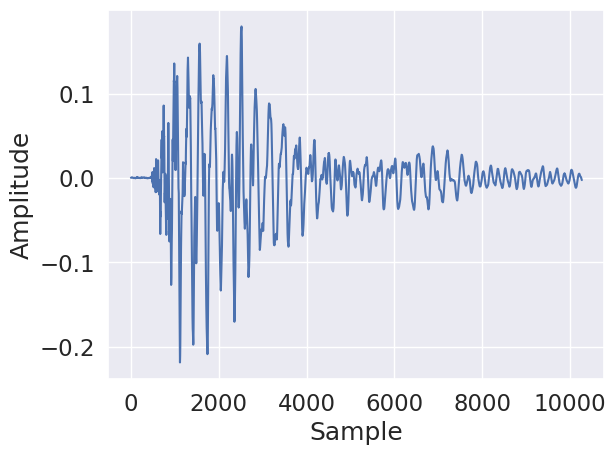

1/1 [==============================] - 0s 144ms/step
Prediction: Flute


In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Load the trained model
model = load_model('classification_model.h5')

# Function to preprocess audio
def preprocess_audio(audio_path):
    try:
        # Load audio file
        y, sr = librosa.load(audio_path, sr=None)

        # Display the audio waveform
        print("Audio waveform:")
        plt.plot(y)
        plt.xlabel('Sample')
        plt.ylabel('Amplitude')
        plt.show()

        # Check if the audio is stereo and convert to mono
        if y.ndim > 1:
            print("Converting stereo to mono...")
            y = np.mean(y, axis=1)

        # Check the sampling rate and resample if needed
        if sr != 44100:
            print(f"Converting sampling rate from {sr} to 44100...")
            y = librosa.resample(y, orig_sr=sr, target_sr=44100)
            sr = 44100

        # Set the length to 2.1 seconds (92610 samples)
        target_length = 92610
        if len(y) < target_length:
            y = np.pad(y, (0, target_length - len(y)))
        elif len(y) > target_length:
            y = y[:target_length]

        # Convert to mel spectrograms
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
        mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

        return mel_spec
    except Exception as e:
        print(f"Error processing {audio_path}: {str(e)}")
        return None

# Function to make predictions
def predict(audio_path):
    try:
        # Preprocess audio
        mel_spec = preprocess_audio(audio_path)

        if mel_spec is not None:
            # Reshape for model input
            mel_spec = np.expand_dims(mel_spec, axis=-1)
            mel_spec = np.expand_dims(mel_spec, axis=0)

            # Get prediction
            prediction = model.predict(mel_spec)

            # Get the predicted class
            if prediction.argmax() == 0:
                return "Flute"
            elif prediction.argmax() == 1:
                return "Gataberaya"
            else:
                return "Unknown"
        else:
            return "Error"
    except Exception as e:
        print(f"Error processing {audio_path}: {str(e)}")
        return "Error"

# Example usage
audio_file = '/content/gdrive/MyDrive/Audio/Beraya /Dom/dom3-4.wav'
prediction = predict(audio_file)
print("Prediction:", prediction)
